<a href="https://colab.research.google.com/github/FaridRash/Advance-Statistical-Learnin--Semester-3/blob/main/Farid/Farid_Multi_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Libraries

In [1]:
!pip install scikeras

#Git

In [2]:
!git clone https://github.com/FaridRash/Advance-Statistical-Learnin--Semester-3

Cloning into 'Advance-Statistical-Learnin--Semester-3'...
remote: Enumerating objects: 517, done.
remote: Counting objects: 100% (144/144), done.
remote: Compressing objects: 100% (133/133), done.
remote: Total 517 (delta 91), reused 11 (delta 11), pack-reused 373 (from 2)
Receiving objects: 100% (517/517), 56.61 MiB | 7.95 MiB/s, done.
Resolving deltas: 100% (248/248), done.


#Data Reading

In [3]:
import pandas as pd

df = pd.read_csv('/content/Advance-Statistical-Learnin--Semester-3/Dataset/df_Final.csv')
display(df.head())

,Patient_ID,Visit_ID,Sex,Age_at_onset,Clinical_onset_type,Spirometry,FVC,Ventilation,Tracheostomy,PEG,...,MRC_Bulbar,PUMNS_Upper_Limb,PUMNS_Lower_Limb,PUMNS_Bulbar,CNS_Linear_Score,KINGS_Total,Disease_duration,Progression_rate,ALSFRS_R,ALSAQ_5
0,133,3,0,19.0,spinale,1.0,>80,0.0,0,0.0,...,14.0,0.0,6.0,0.0,7.0,1,40.0,0.075000,45.0,0.0
1,79,1,0,65.0,spinale,1.0,40-60,0.0,0,0.0,...,13.0,1.0,4.0,3.0,15.0,1,14.0,0.714286,38.0,15.0
2,81,1,1,79.0,bulbare,1.0,>80,0.0,0,0.0,...,11.0,4.0,4.0,2.0,7.0,1,6.0,0.833333,43.0,20.0
3,214,1,0,51.0,spinale,1.0,>80,0.0,0,0.0,...,15.0,0.0,0.0,0.0,7.0,1,20.0,0.200000,44.0,20.0
4,214,2,0,51.0,spinale,1.0,>80,0.0,0,0.0,...,15.0,0.0,0.0,0.0,7.0,1,23.0,0.130435,45.0,25.0


In [4]:
display(df.columns)

Index(['Patient_ID', 'Visit_ID', 'Sex', 'Age_at_onset', 'Clinical_onset_type',
       'Spirometry', 'FVC', 'Ventilation', 'Tracheostomy', 'PEG', 'Therapy',
       'Diagnostic_delay', 'MRC_Upper_Limb', 'MRC_Lower_Limb', 'MRC_Bulbar',
       'PUMNS_Upper_Limb', 'PUMNS_Lower_Limb', 'PUMNS_Bulbar',
       'CNS_Linear_Score', 'KINGS_Total', 'Disease_duration',
       'Progression_rate', 'ALSFRS_R', 'ALSAQ_5'],
      dtype='object')

#Tree-Based

##Tree-based Preprocessing

In [5]:
"""
Ordinal Data:
FVC


Nominal Data:
Tracheostomy - Therapy - Ventilation - PEG - Clinical_onset_type - Spirometry




"""

'\nOrdinal Data:\nFVC\n\n\nNominal Data:\nTracheostomy - Therapy - Ventilation - PEG - Clinical_onset_type - Spirometry\n\n\n\n\n'

### Encoding

In [6]:
from sklearn.preprocessing import LabelEncoder

# Select the nominal columns for encoding
nominal_cols = ['Tracheostomy', 'Therapy', 'Ventilation', 'PEG', 'Clinical_onset_type','Spirometry','FVC']

# Create a copy of the DataFrame to avoid modifying the original
df_tree_encoded = df.copy()

# Apply Label Encoding to each nominal column
for col in nominal_cols:
    le = LabelEncoder()
    df_tree_encoded[col] = le.fit_transform(df_tree_encoded[col])

# Display the first few rows of the new DataFrame to verify
display(df_tree_encoded.head())

,Patient_ID,Visit_ID,Sex,Age_at_onset,Clinical_onset_type,Spirometry,FVC,Ventilation,Tracheostomy,PEG,...,MRC_Bulbar,PUMNS_Upper_Limb,PUMNS_Lower_Limb,PUMNS_Bulbar,CNS_Linear_Score,KINGS_Total,Disease_duration,Progression_rate,ALSFRS_R,ALSAQ_5
0,133,3,0,19.0,3,1,3,0,0,0,...,14.0,0.0,6.0,0.0,7.0,1,40.0,0.075000,45.0,0.0
1,79,1,0,65.0,3,1,0,0,0,0,...,13.0,1.0,4.0,3.0,15.0,1,14.0,0.714286,38.0,15.0
2,81,1,1,79.0,0,1,3,0,0,0,...,11.0,4.0,4.0,2.0,7.0,1,6.0,0.833333,43.0,20.0
3,214,1,0,51.0,3,1,3,0,0,0,...,15.0,0.0,0.0,0.0,7.0,1,20.0,0.200000,44.0,20.0
4,214,2,0,51.0,3,1,3,0,0,0,...,15.0,0.0,0.0,0.0,7.0,1,23.0,0.130435,45.0,25.0


In [7]:
# Drop the 'Patient_ID' and 'Visit_ID' column
df_tree_encoded = df_tree_encoded.drop('Patient_ID', axis=1)
df_tree_encoded = df_tree_encoded.drop('Visit_ID', axis=1)

# Display the first few rows to verify
display(df_tree_encoded.head())

,Sex,Age_at_onset,Clinical_onset_type,Spirometry,FVC,Ventilation,Tracheostomy,PEG,Therapy,Diagnostic_delay,...,MRC_Bulbar,PUMNS_Upper_Limb,PUMNS_Lower_Limb,PUMNS_Bulbar,CNS_Linear_Score,KINGS_Total,Disease_duration,Progression_rate,ALSFRS_R,ALSAQ_5
0,0,19.0,3,1,3,0,0,0,1,33.0,...,14.0,0.0,6.0,0.0,7.0,1,40.0,0.075000,45.0,0.0
1,0,65.0,3,1,0,0,0,0,3,14.0,...,13.0,1.0,4.0,3.0,15.0,1,14.0,0.714286,38.0,15.0
2,1,79.0,0,1,3,0,0,0,3,6.0,...,11.0,4.0,4.0,2.0,7.0,1,6.0,0.833333,43.0,20.0
3,0,51.0,3,1,3,0,0,0,1,18.0,...,15.0,0.0,0.0,0.0,7.0,1,20.0,0.200000,44.0,20.0
4,0,51.0,3,1,3,0,0,0,1,18.0,...,15.0,0.0,0.0,0.0,7.0,1,23.0,0.130435,45.0,25.0


###Splitting

In [8]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df_tree_encoded.drop('KINGS_Total', axis=1)
y = df_tree_encoded['KINGS_Total']

# Split data into training and testing sets
X_train_tree, X_test_tree, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train_tree.shape)
print("Testing set shape:", X_test_tree.shape)

Training set shape: (1129, 21)
Testing set shape: (283, 21)


###SMOTE

In [9]:
from imblearn.over_sampling import SMOTE
import numpy as np

# Define which classes to oversample
target_classes = [1, 2]

# Create a dictionary with sampling strategy
# Example: balance 1 and 2 to reach size of class 3
class_counts = y_train.value_counts()
print("Before SMOTE:", class_counts)

sampling_strategy = {
    1: class_counts[3],  # make class 1 as large as class 3
    2: class_counts[3]   # make class 2 as large as class 3
}

# Apply SMOTE
sm = SMOTE(sampling_strategy=sampling_strategy, random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_tree, y_train)

print("After SMOTE:", y_train_res.value_counts())


Before SMOTE: KINGS_Total
4    339
3    331
2    257
1    202
Name: count, dtype: int64
After SMOTE: KINGS_Total
4    339
3    331
2    331
1    331
Name: count, dtype: int64


###Scaling

In [10]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Define the list of numerical features to standardize
numerical_features = [
    'Age_at_onset', 'Diagnostic_delay', 'MRC_Upper_Limb', 'MRC_Lower_Limb',
    'MRC_Bulbar', 'PUMNS_Upper_Limb', 'PUMNS_Lower_Limb', 'PUMNS_Bulbar',
    'CNS_Linear_Score', 'Disease_duration', 'Progression_rate', 'ALSFRS_R', 'ALSAQ_5'
]

# Separate numerical and categorical features
X_train_numerical = X_train_res[numerical_features]
X_test_numerical = X_test_tree[numerical_features]

# Select the categorical features (all columns not in numerical_features)
categorical_features = X_train_res.columns.difference(numerical_features)
X_train_categorical = X_train_res[categorical_features]
X_test_categorical = X_test_tree[categorical_features]


# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data for numerical features
X_train_scaled_numerical = scaler.fit_transform(X_train_numerical)
X_test_scaled_numerical = scaler.transform(X_test_numerical)

# Convert scaled numerical arrays back to DataFrames for easier concatenation
X_train_scaled_numerical_df = pd.DataFrame(X_train_scaled_numerical, columns=numerical_features, index=X_train_res.index)
X_test_scaled_numerical_df = pd.DataFrame(X_test_scaled_numerical, columns=numerical_features, index=X_test_tree.index)

# Concatenate the scaled numerical features with the original categorical features
X_train_scaled_tree = pd.concat([X_train_scaled_numerical_df, X_train_categorical], axis=1)
X_test_scaled_tree = pd.concat([X_test_scaled_numerical_df, X_test_categorical], axis=1)


print("Training data shape after selective scaling:", X_train_scaled_tree.shape)
print("Testing data shape after selective scaling:", X_test_scaled_tree.shape)

Training data shape after selective scaling: (1332, 21)
Testing data shape after selective scaling: (283, 21)


##Tree-based Modeling

###RF

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import ParameterGrid

# Initialize and train the RandomForestClassifier model with the specified parameters
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    bootstrap=True,
    criterion='gini',
    class_weight=None,
    random_state=42
)
model.fit(X_train_scaled_tree, y_train_res)

# Make predictions on the test set
y_test_pred = model.predict(X_test_scaled_tree)
# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)

# Make predictions on the training set
y_train_pred = model.predict(X_train_scaled_tree)
# Evaluate the model on the training set
train_accuracy = accuracy_score(y_train_res, y_train_pred)
print(f"Accuracy on training set: {train_accuracy:.4f}")
print(f"Accuracy on test set: {test_accuracy:.4f}\n")

# Note: This approach doesn't perform cross-validation and is just training
# and evaluating the model with the specified parameters on a single split.

Accuracy on training set: 1.0000
Accuracy on test set: 0.8163



Random Forest Feature Importances:


,0
ALSFRS_R,0.195622
Ventilation,0.108979
ALSAQ_5,0.086566
MRC_Upper_Limb,0.069162
Progression_rate,0.060278
MRC_Bulbar,0.057209
MRC_Lower_Limb,0.056584
Age_at_onset,0.052304
Disease_duration,0.047631
PUMNS_Upper_Limb,0.045538


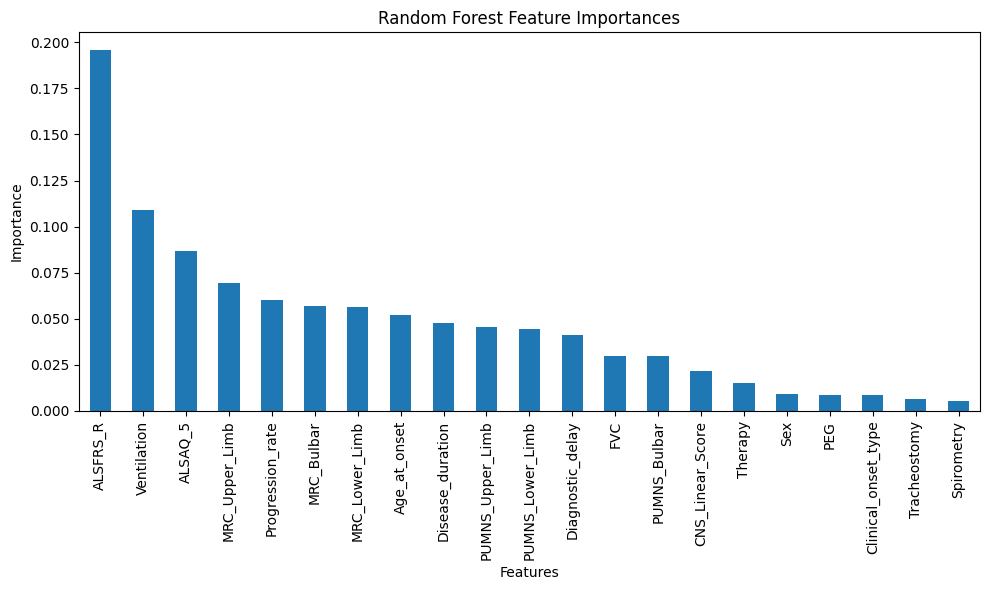

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances from the trained Random Forest model
feature_importances = model.feature_importances_

# Get the feature names from the training data (using X_train_scaled_tree)
feature_names = X_train_scaled_tree.columns

# Create a pandas Series for better visualization
feature_importance_series = pd.Series(feature_importances, index=feature_names)

# Sort the feature importances in descending order
sorted_feature_importances = feature_importance_series.sort_values(ascending=False)

# Print or display the sorted feature importances
print("Random Forest Feature Importances:")
display(sorted_feature_importances)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sorted_feature_importances.plot(kind='bar')
plt.title('Random Forest Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

###XGBoost

In [13]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Initialize the XGBoost Classifier model with the specified parameters
model_xgb = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=len(y.unique()),
    random_state=42,
    n_estimators=300,
    max_depth=3,
    learning_rate=0.05,
    subsample=1.0,
    colsample_bytree=1.0
)

# Adjust the target variable to be 0-indexed for XGBoost
y_train_indexed = y_train_res - 1
y_test_indexed = y_test - 1


# Train the model using the scaled data
model_xgb.fit(X_train_scaled_tree, y_train_indexed)

# Make predictions on the scaled test set
y_pred_xgb = model_xgb.predict(X_test_scaled_tree)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test_indexed, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb:.4f}")

# Print classification report for more detailed evaluation
print("\nXGBoost Classification Report:")
print(classification_report(y_test_indexed, y_pred_xgb))

XGBoost Accuracy: 0.8092

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.83      0.78        48
           1       0.62      0.60      0.61        53
           2       0.83      0.72      0.77        83
           3       0.93      0.98      0.96        99

    accuracy                           0.81       283
   macro avg       0.78      0.78      0.78       283
weighted avg       0.81      0.81      0.81       283



XGBoost Feature Importances:


,0
Ventilation,0.424309
ALSFRS_R,0.078825
PUMNS_Lower_Limb,0.076455
MRC_Bulbar,0.044263
PUMNS_Upper_Limb,0.039499
MRC_Upper_Limb,0.029683
ALSAQ_5,0.029591
Clinical_onset_type,0.027286
MRC_Lower_Limb,0.026522
PUMNS_Bulbar,0.025875


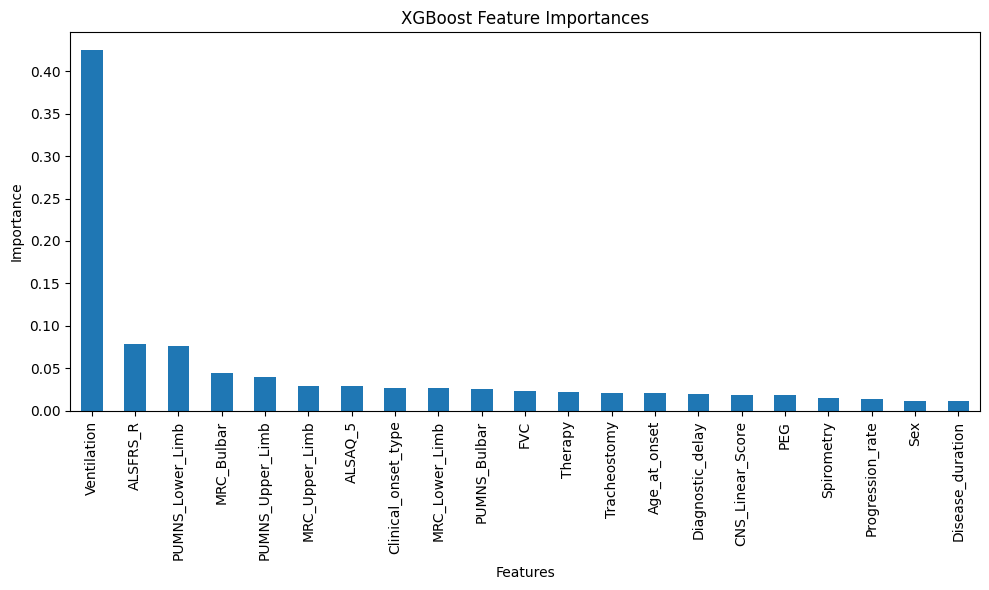

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances from the trained XGBoost model
feature_importances_xgb = model_xgb.feature_importances_

# Get the feature names from the training data (using X_train_scaled_tree as XGBoost was trained on this)
feature_names_xgb = X_train_scaled_tree.columns

# Create a pandas Series for better visualization
feature_importance_series_xgb = pd.Series(feature_importances_xgb, index=feature_names_xgb)

# Sort the feature importances in descending order
sorted_feature_importances_xgb = feature_importance_series_xgb.sort_values(ascending=False)

# Print or display the sorted feature importances
print("XGBoost Feature Importances:")
display(sorted_feature_importances_xgb)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sorted_feature_importances_xgb.plot(kind='bar')
plt.title('XGBoost Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#Linear

##Linear Preprocessing

###Encoding

In [15]:
from sklearn.preprocessing import LabelEncoder

# Select the 'FVC' column for encoding
fvc_col = ['FVC' , 'Tracheostomy','Spirometry','PEG','Ventilation']

df_linear_encoded = df.copy()


# Apply Label Encoding to the 'FVC' column in df_encoded
for col in fvc_col:
    le = LabelEncoder()
    df_linear_encoded[col] = le.fit_transform(df_linear_encoded[col])

# Display the first few rows of the modified DataFrame to verify
display(df_linear_encoded.head())

,Patient_ID,Visit_ID,Sex,Age_at_onset,Clinical_onset_type,Spirometry,FVC,Ventilation,Tracheostomy,PEG,...,MRC_Bulbar,PUMNS_Upper_Limb,PUMNS_Lower_Limb,PUMNS_Bulbar,CNS_Linear_Score,KINGS_Total,Disease_duration,Progression_rate,ALSFRS_R,ALSAQ_5
0,133,3,0,19.0,spinale,1,3,0,0,0,...,14.0,0.0,6.0,0.0,7.0,1,40.0,0.075000,45.0,0.0
1,79,1,0,65.0,spinale,1,0,0,0,0,...,13.0,1.0,4.0,3.0,15.0,1,14.0,0.714286,38.0,15.0
2,81,1,1,79.0,bulbare,1,3,0,0,0,...,11.0,4.0,4.0,2.0,7.0,1,6.0,0.833333,43.0,20.0
3,214,1,0,51.0,spinale,1,3,0,0,0,...,15.0,0.0,0.0,0.0,7.0,1,20.0,0.200000,44.0,20.0
4,214,2,0,51.0,spinale,1,3,0,0,0,...,15.0,0.0,0.0,0.0,7.0,1,23.0,0.130435,45.0,25.0


In [16]:
# Drop the 'Patient_ID' and 'Visit_ID' column
df_linear_encoded = df_linear_encoded.drop('Patient_ID', axis=1)
df_linear_encoded = df_linear_encoded.drop('Visit_ID', axis=1)


# Display the first few rows to verify
display(df_linear_encoded.head())

,Sex,Age_at_onset,Clinical_onset_type,Spirometry,FVC,Ventilation,Tracheostomy,PEG,Therapy,Diagnostic_delay,...,MRC_Bulbar,PUMNS_Upper_Limb,PUMNS_Lower_Limb,PUMNS_Bulbar,CNS_Linear_Score,KINGS_Total,Disease_duration,Progression_rate,ALSFRS_R,ALSAQ_5
0,0,19.0,spinale,1,3,0,0,0,Riluzolo,33.0,...,14.0,0.0,6.0,0.0,7.0,1,40.0,0.075000,45.0,0.0
1,0,65.0,spinale,1,0,0,0,0,nessuna terapia,14.0,...,13.0,1.0,4.0,3.0,15.0,1,14.0,0.714286,38.0,15.0
2,1,79.0,bulbare,1,3,0,0,0,nessuna terapia,6.0,...,11.0,4.0,4.0,2.0,7.0,1,6.0,0.833333,43.0,20.0
3,0,51.0,spinale,1,3,0,0,0,Riluzolo,18.0,...,15.0,0.0,0.0,0.0,7.0,1,20.0,0.200000,44.0,20.0
4,0,51.0,spinale,1,3,0,0,0,Riluzolo,18.0,...,15.0,0.0,0.0,0.0,7.0,1,23.0,0.130435,45.0,25.0


In [17]:
# Select the columns to one-hot encode
cols_to_onehot = ['Therapy', 'Clinical_onset_type']

# Apply one-hot encoding to the selected columns in df_linear_encoded
df_linear_encoded = pd.get_dummies(df_linear_encoded, columns=cols_to_onehot, dtype=int)

# Display the first few rows of the modified DataFrame to verify
display(df_linear_encoded.head())

,Sex,Age_at_onset,Spirometry,FVC,Ventilation,Tracheostomy,PEG,Diagnostic_delay,MRC_Upper_Limb,MRC_Lower_Limb,...,ALSFRS_R,ALSAQ_5,Therapy_Edaravone,Therapy_Riluzolo,Therapy_Riluzolo e Edaravone,Therapy_nessuna terapia,Clinical_onset_type_bulbare,Clinical_onset_type_multiplo,Clinical_onset_type_respiratorio,Clinical_onset_type_spinale
0,0,19.0,1,3,0,0,0,33.0,61.0,50.0,...,45.0,0.0,0,1,0,0,0,0,0,1
1,0,65.0,1,0,0,0,0,14.0,53.0,58.0,...,38.0,15.0,0,0,0,1,0,0,0,1
2,1,79.0,1,3,0,0,0,6.0,66.0,58.0,...,43.0,20.0,0,0,0,1,1,0,0,0
3,0,51.0,1,3,0,0,0,18.0,51.0,60.0,...,44.0,20.0,0,1,0,0,0,0,0,1
4,0,51.0,1,3,0,0,0,18.0,51.0,60.0,...,45.0,25.0,0,1,0,0,0,0,0,1


###Splitting

In [18]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y) using the updated df_linear_encoded
X_linear = df_linear_encoded.drop('KINGS_Total', axis=1)
y_linear = df_linear_encoded['KINGS_Total']

# Split data into training and testing sets
X_train_linear, X_test_linear, y_train_linear, y_test_linear = train_test_split(X_linear, y_linear, test_size=0.2, random_state=42)

print("Training set shape:", X_train_linear.shape)
print("Testing set shape:", X_test_linear.shape)

Training set shape: (1129, 27)
Testing set shape: (283, 27)


###SMOTE

In [19]:
from imblearn.over_sampling import SMOTE
import numpy as np

# Define which classes to oversample
target_classes = [1, 2]

# Create a dictionary with sampling strategy
# Example: balance 1 and 2 to reach size of class 3
class_counts = y_train.value_counts()
print("Before SMOTE:", class_counts)

sampling_strategy = {
    1: class_counts[3],  # make class 1 as large as class 3
    2: class_counts[3]   # make class 2 as large as class 3
}

# Apply SMOTE
sm = SMOTE(sampling_strategy=sampling_strategy, random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_linear, y_train)

print("After SMOTE:", y_train_res.value_counts())


Before SMOTE: KINGS_Total
4    339
3    331
2    257
1    202
Name: count, dtype: int64
After SMOTE: KINGS_Total
4    339
3    331
2    331
1    331
Name: count, dtype: int64


###Scaling

In [20]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Define the list of numerical features to standardize
numerical_features_linear = [
    'Age_at_onset', 'Diagnostic_delay', 'MRC_Upper_Limb', 'MRC_Lower_Limb',
    'MRC_Bulbar', 'PUMNS_Upper_Limb', 'PUMNS_Lower_Limb', 'PUMNS_Bulbar',
    'CNS_Linear_Score', 'Disease_duration', 'Progression_rate', 'ALSFRS_R', 'ALSAQ_5'
]

# Separate numerical and categorical features for linear models
X_train_linear_numerical = X_train_res[numerical_features_linear]
X_test_linear_numerical = X_test_linear[numerical_features_linear]

# Select the categorical features for linear models (all columns not in numerical_features_linear)
categorical_features_linear = X_train_res.columns.difference(numerical_features_linear)
X_train_linear_categorical = X_train_res[categorical_features_linear]
X_test_linear_categorical = X_test_linear[categorical_features_linear]


# Initialize the StandardScaler
scaler_linear = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data for numerical features
X_train_linear_scaled_numerical = scaler_linear.fit_transform(X_train_linear_numerical)
X_test_linear_scaled_numerical = scaler_linear.transform(X_test_linear_numerical)

# Convert scaled numerical arrays back to DataFrames for easier concatenation
X_train_linear_scaled_numerical_df = pd.DataFrame(X_train_linear_scaled_numerical, columns=numerical_features_linear, index=X_train_res.index)
X_test_linear_scaled_numerical_df = pd.DataFrame(X_test_linear_scaled_numerical, columns=numerical_features_linear, index=X_test_linear.index)

# Concatenate the scaled numerical features with the original categorical features
X_train_linear_scaled = pd.concat([X_train_linear_scaled_numerical_df, X_train_linear_categorical], axis=1)
X_test_linear_scaled = pd.concat([X_test_linear_scaled_numerical_df, X_test_linear_categorical], axis=1)


print("Training data shape after selective scaling:", X_train_linear_scaled.shape)
print("Testing data shape after selective scaling:", X_test_linear_scaled.shape)

Training data shape after selective scaling: (1332, 27)
Testing data shape after selective scaling: (283, 27)


##Linear Modeling

###SVM

In [21]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Initialize the SVM Classifier model with the specified parameters
model_svm = SVC(
    random_state=42,
    kernel='rbf',
    C=5.0,
    gamma='scale',
    class_weight=None
)

# Train the model using the scaled data
model_svm.fit(X_train_linear_scaled, y_train_res)

# Make predictions on the scaled test set
y_pred_svm = model_svm.predict(X_test_linear_scaled)

# Evaluate the model
accuracy_svm = accuracy_score(y_test_linear, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.4f}")

# Print classification report for more detailed evaluation
print("\nSVM Classification Report:")
print(classification_report(y_test_linear, y_pred_svm))

SVM Accuracy: 0.7986

SVM Classification Report:
              precision    recall  f1-score   support

           1       0.71      0.88      0.79        48
           2       0.60      0.68      0.64        53
           3       0.84      0.65      0.73        83
           4       0.94      0.95      0.94        99

    accuracy                           0.80       283
   macro avg       0.77      0.79      0.78       283
weighted avg       0.81      0.80      0.80       283



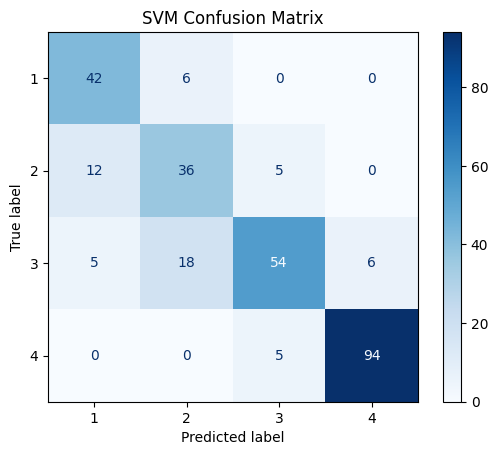

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Make predictions with the SVM model
y_pred_svm = model_svm.predict(X_test_linear_scaled)

# Generate the confusion matrix
cm_svm = confusion_matrix(y_test_linear, y_pred_svm)

# Plot the confusion matrix
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=model_svm.classes_)
disp_svm.plot(cmap=plt.cm.Blues)
plt.title("SVM Confusion Matrix")
plt.show()

###ANN

In [23]:
len(X_train_linear_scaled.columns)

27

In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report

# Set random seed for reproducibility
tf.random.set_seed(42)

# Define the model
model_ann = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_linear_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(len(y_train_linear.unique()), activation='softmax') # Output layer with softmax for multi-class classification
])

# Compile the model
model_ann.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy', # Use sparse_categorical_crossentropy for integer labels
                  metrics=['accuracy'])

# Adjust the target variable to be 0-indexed for ANN
y_train_linear_indexed = y_train_res - 1
y_test_linear_indexed = y_test_linear - 1

# Train the model
history = model_ann.fit(X_train_linear_scaled, y_train_linear_indexed, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

# Evaluate the model on the test set
loss, accuracy_ann = model_ann.evaluate(X_test_linear_scaled, y_test_linear_indexed, verbose=0)
print(f"ANN Accuracy: {accuracy_ann:.4f}")

# Make predictions and print classification report
y_pred_ann = model_ann.predict(X_test_linear_scaled)
y_pred_ann_classes = tf.argmax(y_pred_ann, axis=1)

print("\nANN Classification Report:")
# Use the original y_test_linear for the classification report labels for clarity
print(classification_report(y_test_linear_indexed, y_pred_ann_classes))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ANN Accuracy: 0.7880
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 

ANN Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.79      0.78        48
           1       0.58      0.62      0.60        53
           2       0.81      0.71      0.76        83
           3       0.90      0.94      0.92        99

    accuracy                           0.79       283
   macro avg       0.76      0.77      0.76       283
weighted avg       0.79      0.79      0.79       283



#Multi Modeling

##With SVM

###Modeling

In [25]:
# === MULTI-MODEL ENSEMBLE (RF + XGB + SVM + ANN [+ Keras NN optional]) ===
# Expects these to exist in your workspace:
#   X_train_scaled_tree, X_test_scaled_tree
#   X_train_linear_scaled, X_test_linear_scaled
#   y_train, y_test
# -------------------------------------------------------------------------

import numpy as np
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


# 0) Labels to 0..K-1
y_train_idx = y_train_res - 1
y_test_idx  = y_test  - 1
n_classes   = len(np.unique(y_train_idx))

# 1) Your tuned Random Forest (TREE features) - Updated with specified parameters
rf = RandomForestClassifier(
    random_state=42,
    n_estimators=100,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    bootstrap=True,
    criterion='gini',
    class_weight=None
)

# 2) Other base models
#    XGBoost (TREE features) - Updated with specified parameters
xgb_model = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=len(y.unique()),
    random_state=42,
    n_estimators=300,
    max_depth=3,
    learning_rate=0.05,
    subsample=1.0,
    colsample_bytree=1.0
)

#    SVM (LINEAR features) - Updated with specified parameters
svm_model = SVC(
    random_state=42,
    probability=True,
    kernel='rbf',
    C=5.0,
    gamma='scale',
    class_weight=None
)


# Keras ANN (LINEAR features)
ann_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_linear_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(n_classes, activation='softmax') # Output layer with softmax for multi-class classification
])

ann_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy', # Use sparse_categorical_crossentropy for integer labels
                  metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)


# 3) Fit each model on its OWN feature matrix
rf.fit (X_train_scaled_tree,   y_train_idx)
xgb_model.fit(X_train_scaled_tree,   y_train_idx)
svm_model.fit(X_train_linear_scaled, y_train_idx)
ann_model.fit(X_train_linear_scaled, y_train_idx, validation_split=0.2, epochs=50, batch_size=32, verbose=0, callbacks=[es])


# 4) Predict probabilities on matching test sets
p_rf  = rf.predict_proba (X_test_scaled_tree)            # (n, C)
p_xgb = xgb_model.predict_proba(X_test_scaled_tree)
p_svm = svm_model.predict_proba(X_test_linear_scaled)
p_ann = ann_model.predict(X_test_linear_scaled) # Keras predict gives probabilities directly


probs_list = [p_rf, p_xgb, p_svm, p_ann] # Included  ann
weights    = np.array([1.0, 1.0, 0.9, 1.0], dtype=float)  # rf, xgb, svm, ann - added weights for mlp and ann


# 5) Weighted soft voting
P = sum(w * p for w, p in zip(weights, probs_list)) / weights.sum()
y_pred_ens = P.argmax(axis=1)

# 6) Evaluate ensemble and each single model
print("=== ENSEMBLE ===")
print("Accuracy:", accuracy_score(y_test_idx, y_pred_ens))
print("Macro-F1:", f1_score(y_test_idx, y_pred_ens, average="macro"))
print(classification_report(y_test_idx, y_pred_ens, digits=3))

def report_single(name, probs):
    yhat = probs.argmax(axis=1)
    print(f"\n--- {name} ---")
    print("Accuracy:", accuracy_score(y_test_idx, yhat))
    print("Macro-F1:", f1_score(y_test_idx, yhat, average="macro"))

report_single("RF",  p_rf)
report_single("XGB", p_xgb)
report_single("SVM", p_svm)
report_single("ANN", p_ann) # Added ANN report

# (Optional) Keep probabilities for later use in other blends
# p_stack = np.hstack(probs_list)  # meta-features for stacking if you want later

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
=== ENSEMBLE ===
Accuracy: 0.8162544169611308
Macro-F1: 0.7896278252626534
              precision    recall  f1-score   support

           0      0.750     0.812     0.780        48
           1      0.603     0.660     0.631        53
           2      0.871     0.735     0.797        83
           3      0.932     0.970     0.950        99

    accuracy                          0.816       283
   macro avg      0.789     0.794     0.790       283
weighted avg      0.822     0.816     0.817       283


--- RF ---
Accuracy: 0.8162544169611308
Macro-F1: 0.7909149544985459

--- XGB ---
Accuracy: 0.8091872791519434
Macro-F1: 0.7790203529169155

--- SVM ---
Accuracy: 0.784452296819788
Macro-F1: 0.7576666093879771

--- ANN ---
Accuracy: 0.8056537102473498
Macro-F1: 0.7834720589145368


###Confusion Matrix



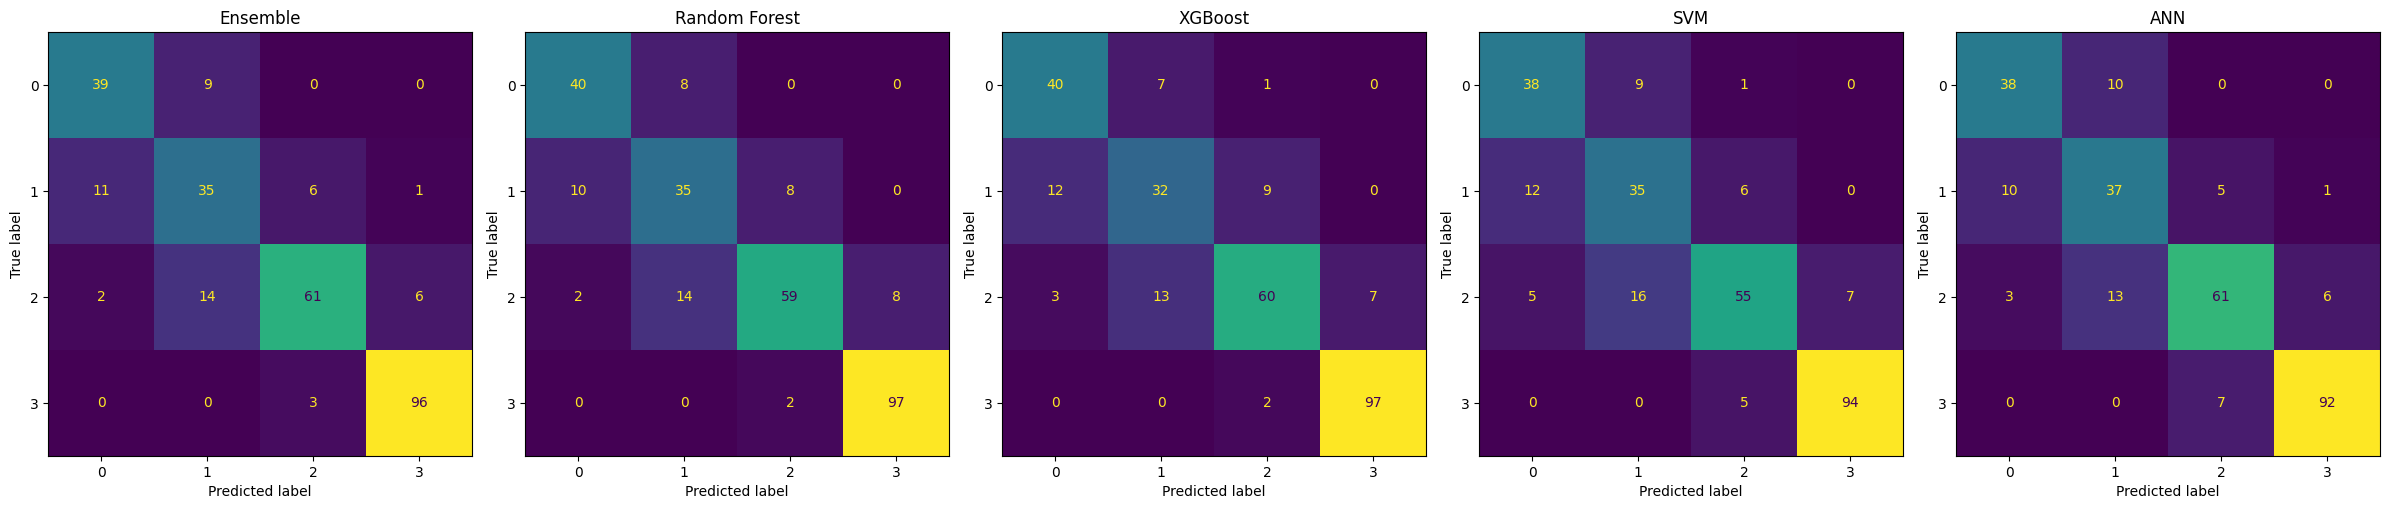

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# True labels
y_true = y_test_idx

# Predictions for each model (argmax over probabilities)
y_pred_ens = P.argmax(axis=1)
y_pred_rf  = p_rf.argmax(axis=1)
y_pred_xgb = p_xgb.argmax(axis=1)
y_pred_svm = p_svm.argmax(axis=1)
y_pred_ann = p_ann.argmax(axis=1) # Get predictions for ANN


models = {
    "Ensemble": y_pred_ens,
    "Random Forest": y_pred_rf,
    "XGBoost": y_pred_xgb,
    "SVM": y_pred_svm,
    "ANN": y_pred_ann, # Add ANN to the models dictionary
}

# Plot confusion matrices
fig, axes = plt.subplots(1, len(models), figsize=(24, 5)) # Adjust figsize to accommodate the new plot

for ax, (name, y_pred) in zip(axes, models.items()):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=ax, cmap='viridis', colorbar=False) # Using viridis colormap for better visibility
    ax.set_title(name)

plt.tight_layout()
plt.show()

##Whitout SVM

###Modeling

In [27]:
# === MULTI-MODEL ENSEMBLE (RF + XGB + ANN) ===
# Expects these to exist in your workspace:
#   X_train_scaled_tree, X_test_scaled_tree
#   X_train_linear_scaled, X_test_linear_scaled
#   y_train, y_test
# -------------------------------------------------------------------------

import numpy as np
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


# 0) Labels to 0..K-1
y_train_idx = y_train_res - 1
y_test_idx  = y_test  - 1
n_classes   = len(np.unique(y_train_idx))

# 1) Your tuned Random Forest (TREE features) - Updated with specified parameters
rf = RandomForestClassifier(
    random_state=42,
    n_estimators=100,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    bootstrap=True,
    criterion='gini',
    class_weight=None
)

# 2) Other base models
#    XGBoost (TREE features) - Updated with specified parameters
xgb_model = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=len(y.unique()),
    random_state=42,
    n_estimators=300,
    max_depth=3,
    learning_rate=0.05,
    subsample=1.0,
    colsample_bytree=1.0
)

# Keras ANN (LINEAR features)
ann_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_linear_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(n_classes, activation='softmax') # Output layer with softmax for multi-class classification
])

ann_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy', # Use sparse_categorical_crossentropy for integer labels
                  metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)


# 3) Fit each model on its OWN feature matrix
rf.fit (X_train_scaled_tree,   y_train_idx)
xgb_model.fit(X_train_scaled_tree,   y_train_idx)
# Fit the Keras ANN model
ann_model.fit(X_train_linear_scaled, y_train_idx, validation_split=0.15, epochs=200, batch_size=32, verbose=0, callbacks=[es])


# 4) Predict probabilities on matching test sets
p_rf  = rf.predict_proba (X_test_scaled_tree)            # (n, C)
p_xgb = xgb_model.predict_proba(X_test_scaled_tree)
p_ann = ann_model.predict(X_test_linear_scaled) # Keras predict gives probabilities directly


probs_list = [p_rf, p_xgb, p_ann] # Only RF, XGB, and ANN
weights    = np.array([1.0, 1.0, 1.0], dtype=float)  # Adjusted weights for RF, XGB, and ANN


# 5) Weighted soft voting
P = sum(w * p for w, p in zip(weights, probs_list)) / weights.sum()
y_pred_ens = P.argmax(axis=1)

# 6) Evaluate ensemble and each single model
print("=== ENSEMBLE ===")
print("Accuracy:", accuracy_score(y_test_idx, y_pred_ens))
print("Macro-F1:", f1_score(y_test_idx, y_pred_ens, average="macro"))
print(classification_report(y_test_idx, y_pred_ens, digits=3))

def report_single(name, probs):
    yhat = probs.argmax(axis=1)
    print(f"\n--- {name} ---")
    print("Accuracy:", accuracy_score(y_test_idx, yhat))
    print("Macro-F1:", f1_score(y_test_idx, yhat, average="macro"))

report_single("RF",  p_rf)
report_single("XGB", p_xgb)
report_single("ANN", p_ann) # Added ANN report

# (Optional) Keep probabilities for later use in other blends
# p_stack = np.hstack(probs_list)  # meta-features for stacking if you want later

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
=== ENSEMBLE ===
Accuracy: 0.7915194346289752
Macro-F1: 0.7705899689545226
              precision    recall  f1-score   support

           0      0.771     0.771     0.771        48
           1      0.585     0.717     0.644        53
           2      0.836     0.675     0.747        83
           3      0.903     0.939     0.921        99

    accuracy                          0.792       283
   macro avg      0.774     0.775     0.771       283
weighted avg      0.801     0.792     0.792       283


--- RF ---
Accuracy: 0.8162544169611308
Macro-F1: 0.7909149544985459

--- XGB ---
Accuracy: 0.8091872791519434
Macro-F1: 0.7790203529169155

--- ANN ---
Accuracy: 0.773851590106007
Macro-F1: 0.754731963042331


###Confusion Matrix


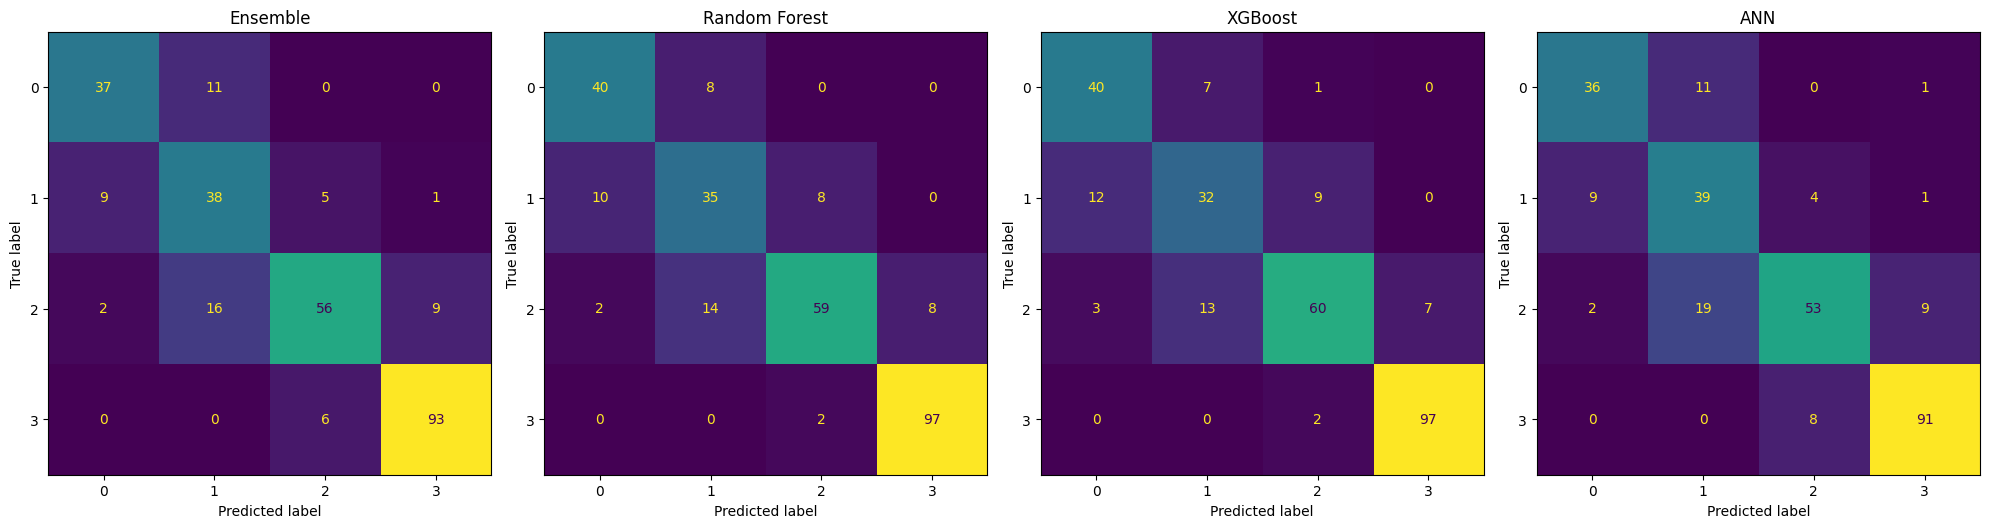

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# True labels
y_true = y_test_idx

# Predictions for each model (argmax over probabilities)
y_pred_ens = P.argmax(axis=1)
y_pred_rf  = p_rf.argmax(axis=1)
y_pred_xgb = p_xgb.argmax(axis=1)
# y_pred_svm = p_svm.argmax(axis=1) # Removed SVM prediction
y_pred_ann = p_ann.argmax(axis=1) # Get predictions for ANN


models = {
    "Ensemble": y_pred_ens,
    "Random Forest": y_pred_rf,
    "XGBoost": y_pred_xgb,
    # "SVM": y_pred_svm, # Removed SVM from the models dictionary
    "ANN": y_pred_ann, # Add ANN to the models dictionary
}

# Plot confusion matrices
fig, axes = plt.subplots(1, len(models), figsize=(20, 5)) # Adjusted figsize

for ax, (name, y_pred) in zip(axes, models.items()):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=ax, cmap='viridis', colorbar=False) # Using viridis colormap for better visibility
    ax.set_title(name)

plt.tight_layout()
plt.show()

#Interpretation

##Bayesian posterior


=== Ensemble ===


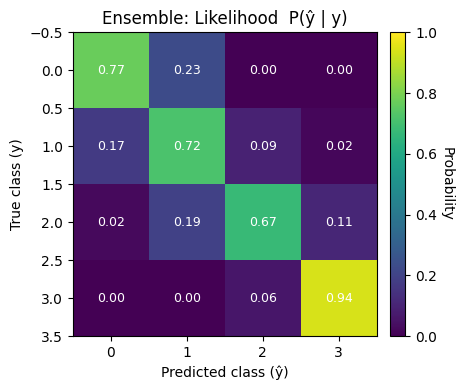

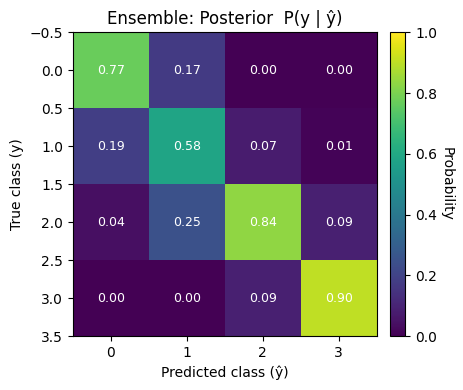

Prior P(y):         [0.17  0.187 0.293 0.35 ]
Evidence P(ŷ):      [0.17  0.23  0.237 0.364]

=== Random Forest ===


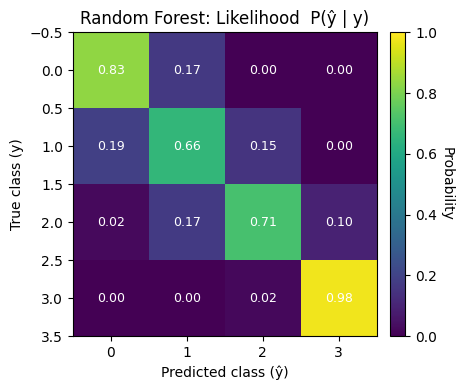

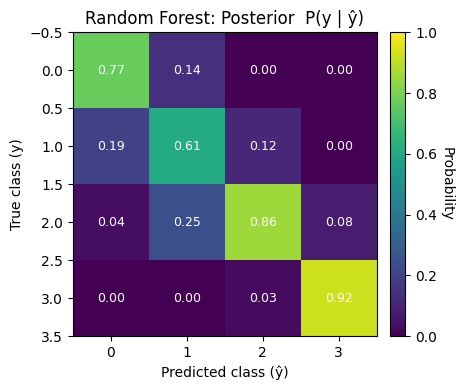

Prior P(y):         [0.17  0.187 0.293 0.35 ]
Evidence P(ŷ):      [0.184 0.201 0.244 0.371]

=== XGBoost ===


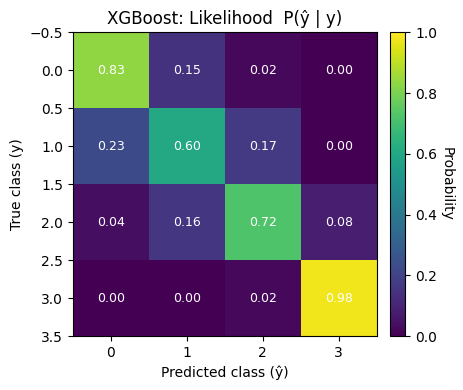

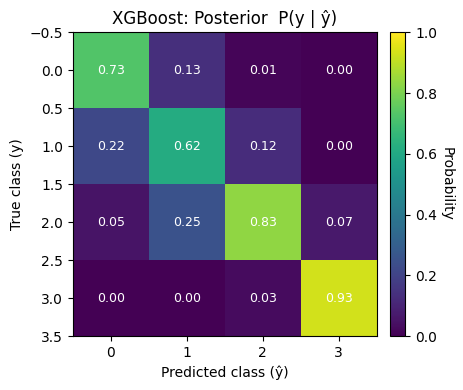

Prior P(y):         [0.17  0.187 0.293 0.35 ]
Evidence P(ŷ):      [0.194 0.184 0.254 0.367]

=== ANN ===


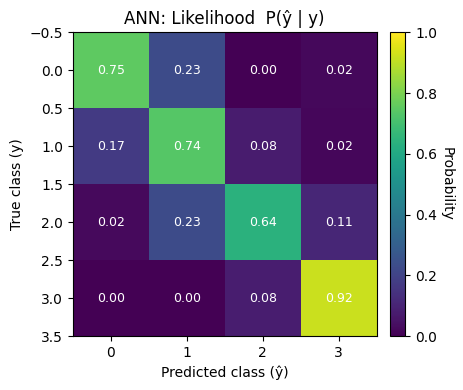

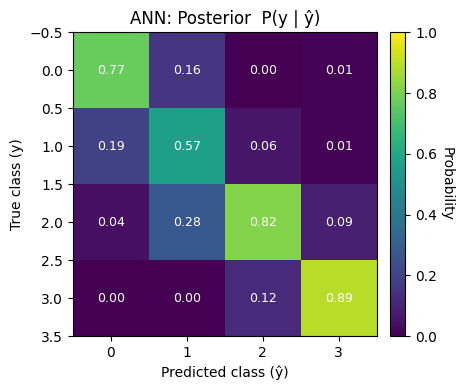

Prior P(y):         [0.17  0.187 0.293 0.35 ]
Evidence P(ŷ):      [0.166 0.244 0.23  0.36 ]

Ensemble: Posterior P(y |  ŷ=0) = [0.771 0.187 0.042 0.   ]   (evidence P(ŷ=0) = 0.170)

Ensemble: Posterior P(y |  ŷ=1) = [0.169 0.585 0.246 0.   ]   (evidence P(ŷ=1) = 0.230)

Ensemble: Posterior P(y |  ŷ=2) = [0.    0.075 0.836 0.09 ]   (evidence P(ŷ=2) = 0.237)

Ensemble: Posterior P(y |  ŷ=3) = [0.    0.01  0.087 0.903]   (evidence P(ŷ=3) = 0.364)


In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def bayes_from_confusion(cm, y_true):
    """
    cm[i,j] = count(true=i, pred=j)
    Returns:
      likelihood:  P(pred=j | true=i)  -> rows sum to 1
      prior_y:     P(true=i)
      evidence:    P(pred=j)
      posterior:   P(true=i | pred=j)  -> columns sum to 1
    """
    cm = cm.astype(float)
    N = cm.sum()
    prior_y = cm.sum(axis=1) / N                               # shape (C,)

    # likelihood: row-normalized confusion (each row sums to 1)
    row_sums = cm.sum(axis=1, keepdims=True)
    likelihood = np.divide(cm, row_sums, out=np.zeros_like(cm), where=row_sums!=0)

    # evidence for each predicted class j: sum_i P(pred=j | true=i) P(true=i)
    evidence = likelihood.T @ prior_y                           # shape (C,)

    # posterior: for each j, P(true=i | pred=j)
    C = cm.shape[0]
    posterior = np.zeros_like(cm)
    for j in range(C):
        if evidence[j] > 0:
            posterior[:, j] = likelihood[:, j] * prior_y / evidence[j]
        else:
            posterior[:, j] = 0.0
    return likelihood, prior_y, evidence, posterior

def plot_matrix(M, title, xlabel, ylabel, vmin=0, vmax=1):
    fig, ax = plt.subplots(figsize=(4.6, 4))
    im = ax.imshow(M, vmin=vmin, vmax=vmax, cmap="viridis")
    for i in range(M.shape[0]):
        for j in range(M.shape[1]):
            ax.text(j, i, f"{M[i,j]:.2f}", ha="center", va="center", color="w", fontsize=9)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    cbar.ax.set_ylabel("Probability", rotation=270, labelpad=12)
    plt.tight_layout()
    plt.show()

# --- compute + plot for each model ---
for name, y_pred in models.items():
    print(f"\n=== {name} ===")
    cm = confusion_matrix(y_true, y_pred)
    likelihood, prior_y, evidence, posterior = bayes_from_confusion(cm, y_true)

    # Likelihood: P(pred | true)  (your confusion matrix normalized by rows)
    plot_matrix(likelihood, f"{name}: Likelihood  P(ŷ | y)", xlabel="Predicted class (ŷ)", ylabel="True class (y)")

    # Posterior: P(true | predicted)
    plot_matrix(posterior, f"{name}: Posterior  P(y | ŷ)", xlabel="Predicted class (ŷ)", ylabel="True class (y)")

    # (Optional) print priors and evidences
    print("Prior P(y):        ", np.round(prior_y, 3))
    print("Evidence P(ŷ):     ", np.round(evidence, 3))

# --- Example: print Ensemble posteriors for each predicted class ---
ens_cm = confusion_matrix(y_true, models["Ensemble"])
_, _, evidence_ens, posterior_ens = bayes_from_confusion(ens_cm, y_true)

for j in range(posterior_ens.shape[1]):
    print(f"\nEnsemble: Posterior P(y |  ŷ={j}) = {np.round(posterior_ens[:, j], 3)}   "
          f"(evidence P(ŷ={j}) = {evidence_ens[j]:.3f})")


In [30]:
import numpy as np
import pandas as pd

# True labels
y_true = y_test_idx

# Ensemble posterior probabilities (already computed)
probs = P  # shape (n_samples, n_classes)

# 1. Hard predictions and confidence
y_pred = probs.argmax(axis=1)
conf   = probs.max(axis=1)    # model’s confidence in predicted class
entropy = -np.sum(probs * np.log(probs + 1e-12), axis=1)  # predictive entropy

# 2. Build a DataFrame for inspection
df_uncertainty = pd.DataFrame({
    "true": y_true,
    "pred": y_pred,
    "confidence": conf,
    "entropy": entropy
})

# 3. Flag high- vs low-confidence predictions
threshold = 0.7
df_uncertainty["uncertain"] = df_uncertainty["confidence"] < threshold

# 4. Summary
print("Overall accuracy:", (df_uncertainty["true"] == df_uncertainty["pred"]).mean())
print("Mean confidence:", df_uncertainty["confidence"].mean())
print("Fraction uncertain (<0.7):", df_uncertainty["uncertain"].mean())

# 5. Look at uncertain cases
uncertain_cases = df_uncertainty[df_uncertainty["uncertain"]]
print("\nExamples of uncertain predictions:")
print(uncertain_cases.head(10))


Overall accuracy: 0.7915194346289752
Mean confidence: 0.794259258590823
Fraction uncertain (<0.7): 0.31802120141342755

Examples of uncertain predictions:
      true  pred  confidence   entropy  uncertain
339      1     1    0.547747  0.899638       True
192      0     1    0.659921  0.779353       True
67       0     0    0.481050  1.234374       True
1406     3     3    0.593580  0.977367       True
875      2     1    0.645336  0.863866       True
1088     3     3    0.500676  0.915368       True
818      2     2    0.696867  0.785231       True
845      2     3    0.617796  0.749449       True
1362     3     2    0.550529  0.715908       True
819      2     1    0.530218  0.846512       True


In [31]:
print("\nClass-wise average confidence (by predicted class):")
print(df_uncertainty.groupby("pred")["confidence"].mean())

print("\nClass-wise uncertainty rate (fraction below 0.7):")
print(df_uncertainty.groupby("pred")["uncertain"].mean())



Class-wise average confidence (by predicted class):
pred
0    0.761928
1    0.693100
2    0.770824
3    0.888409
Name: confidence, dtype: float64

Class-wise uncertainty rate (fraction below 0.7):
pred
0    0.354167
1    0.523077
2    0.343284
3    0.155340
Name: uncertain, dtype: float64


##Temp

In [32]:
y_pred = P.argmax(axis=1)
print(classification_report(y_test_idx, y_pred))


              precision    recall  f1-score   support

           0       0.77      0.77      0.77        48
           1       0.58      0.72      0.64        53
           2       0.84      0.67      0.75        83
           3       0.90      0.94      0.92        99

    accuracy                           0.79       283
   macro avg       0.77      0.78      0.77       283
weighted avg       0.80      0.79      0.79       283



In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

confidence = P.max(axis=1)
y_pred = P.argmax(axis=1)
y_true = y_test_idx # Assuming y_test_idx is the true labels (0-indexed)

# Create a DataFrame to easily filter and analyze
df_results = pd.DataFrame({
    'confidence': confidence,
    'y_pred': y_pred,
    'y_true': y_true
})

# Define the range of confidence thresholds and step
confidence_thresholds = np.arange(0.60, 0.80, 0.01)

# Arrays to store results
accuracies_at_threshold = []
fractions_trusted = []

# Calculate accuracy and fraction of data trusted for each threshold
for threshold in confidence_thresholds:
    # Filter for predictions with confidence >= threshold
    trusted_predictions = df_results[df_results['confidence'] >= threshold].copy()

    # Calculate accuracy for trusted predictions
    if not trusted_predictions.empty:
        accuracy = (trusted_predictions['y_pred'] == trusted_predictions['y_true']).mean()
        fraction_trusted = len(trusted_predictions) / len(df_results)
    else:
        accuracy = 0.0 # Or np.nan, depending on how you want to represent empty ranges
        fraction_trusted = 0.0

    accuracies_at_threshold.append(accuracy)
    fractions_trusted.append(fraction_trusted)

# Now you have confidence_thresholds, accuracies_at_threshold, and fractions_trusted arrays
# ready for plotting.
print("Calculated accuracies for confidence thresholds.")
print("Confidence Thresholds:", np.round(confidence_thresholds, 2))
print("Accuracies:", np.round(accuracies_at_threshold, 4))
print("Fraction Trusted:", np.round(fractions_trusted, 4))

# The arrays confidence_thresholds, accuracies_at_threshold, and fractions_trusted
# are available in the notebook's environment for subsequent plotting.

Calculated accuracies for confidence thresholds.
Confidence Thresholds: [0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69 0.7  0.71 0.72 0.73
 0.74 0.75 0.76 0.77 0.78 0.79 0.8 ]
Accuracies: [0.8565 0.8578 0.8609 0.864  0.8649 0.8756 0.8852 0.8841 0.8878 0.8939
 0.9016 0.9048 0.9086 0.9066 0.905  0.9249 0.924  0.9325 0.9317 0.9355
 0.9416]
Fraction Trusted: [0.8375 0.8198 0.8127 0.8057 0.7845 0.7668 0.7385 0.7314 0.7244 0.6996
 0.682  0.6678 0.6572 0.6431 0.6325 0.6113 0.6042 0.576  0.5689 0.5477
 0.5442]


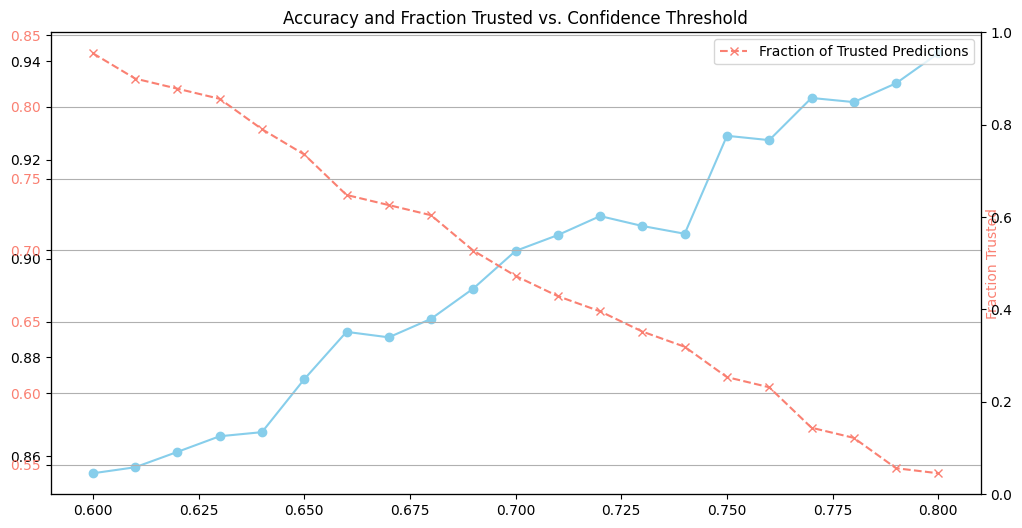

In [34]:
import matplotlib.pyplot as plt

# Assuming confidence_thresholds, accuracies_at_threshold, and fractions_trusted are available

plt.figure(figsize=(12, 6))

# Plot Accuracy vs. Confidence Threshold
plt.plot(confidence_thresholds, accuracies_at_threshold, marker='o', linestyle='-', color='skyblue', label='Accuracy of Trusted Predictions')

# Plot Fraction Trusted vs. Confidence Threshold (on a secondary y-axis)
plt.twinx() # Create a secondary y-axis
plt.plot(confidence_thresholds, fractions_trusted, marker='x', linestyle='--', color='salmon', label='Fraction of Trusted Predictions')

# Add labels and title
plt.xlabel('Confidence Threshold')
plt.ylabel('Accuracy', color='skyblue')
plt.tick_params(axis='y', labelcolor='skyblue')
plt.ylabel('Fraction Trusted', color='salmon')
plt.tick_params(axis='y', labelcolor='salmon')
plt.title('Accuracy and Fraction Trusted vs. Confidence Threshold')
plt.grid(True)

# Combine legends from both axes and place it in a location to minimize overlap
lines, labels = plt.gca().get_legend_handles_labels()
lines2, labels2 = plt.gca().twinx().get_legend_handles_labels()
plt.legend(lines + lines2, labels + labels2, loc='best') # Use 'best' or try other locations like 'upper left', 'upper right', or outside the plot

plt.show()

In [35]:
confidence = P.max(axis=1)
y_pred = P.argmax(axis=1)


mask = confidence >= 0.6

# trusted subset
y_true_trusted = y_test_idx[mask]
y_pred_trusted = y_pred[mask]

print("Trusted fraction:", mask.mean())
print("Accuracy (trusted):", (y_true_trusted == y_pred_trusted).mean())


Trusted fraction: 0.8374558303886925
Accuracy (trusted): 0.8565400843881856


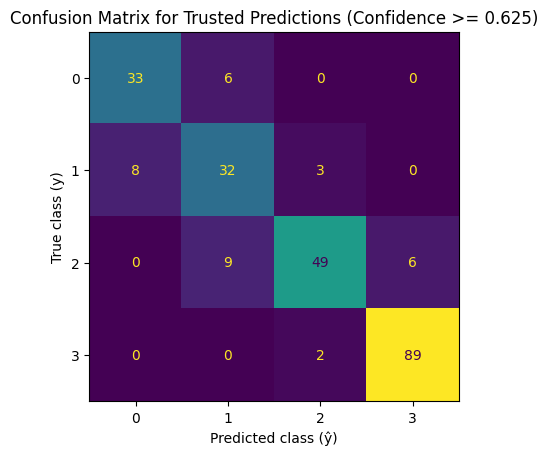

In [36]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# True labels and predictions for the trusted subset
y_true_trusted = y_test_idx[mask]
y_pred_trusted = y_pred[mask]

# Calculate the confusion matrix for the trusted subset
cm_trusted = confusion_matrix(y_true_trusted, y_pred_trusted)

# Plot the confusion matrix
disp_trusted = ConfusionMatrixDisplay(confusion_matrix=cm_trusted)
disp_trusted.plot(cmap='viridis', colorbar=False)
plt.title("Confusion Matrix for Trusted Predictions (Confidence >= 0.625)")
plt.xlabel("Predicted class (ŷ)")
plt.ylabel("True class (y)")
plt.show()


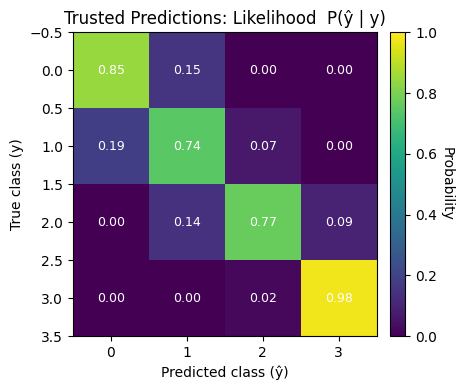

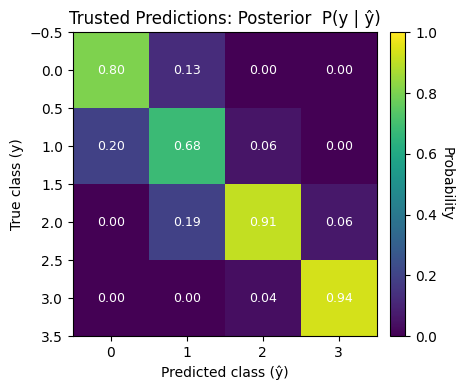


Trusted Predictions Prior P(y):         [0.165 0.181 0.27  0.384]
Trusted Predictions Evidence P(ŷ):      [0.173 0.198 0.228 0.401]


In [37]:
# Calculate and plot likelihood and posterior for the trusted subset
likelihood_trusted, prior_y_trusted, evidence_trusted, posterior_trusted = bayes_from_confusion(cm_trusted, y_true_trusted)

# Likelihood: P(pred | true) (your confusion matrix normalized by rows)
plot_matrix(likelihood_trusted, "Trusted Predictions: Likelihood  P(ŷ | y)", xlabel="Predicted class (ŷ)", ylabel="True class (y)")

# Posterior: P(true | predicted)
plot_matrix(posterior_trusted, "Trusted Predictions: Posterior  P(y | ŷ)", xlabel="Predicted class (ŷ)", ylabel="True class (y)")

# (Optional) print priors and evidences
print("\nTrusted Predictions Prior P(y):        ", np.round(prior_y_trusted, 3))
print("Trusted Predictions Evidence P(ŷ):     ", np.round(evidence_trusted, 3))

##Calibration curves from posterior

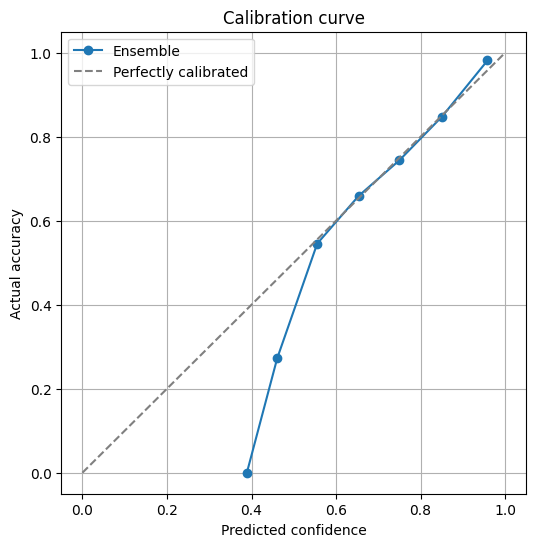

In [38]:
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve

# True labels
y_true = y_test_idx

# Predicted probabilities (take max prob = confidence for each sample)
confidence = P.max(axis=1)
predicted = P.argmax(axis=1)

# Was the prediction correct? (1 = correct, 0 = wrong)
correct = (predicted == y_true).astype(int)

# Calibration curve: fraction of correct vs predicted probability
prob_true, prob_pred = calibration_curve(correct, confidence, n_bins=10, strategy="uniform")

# Plot
plt.figure(figsize=(6,6))
plt.plot(prob_pred, prob_true, marker='o', label="Ensemble")
plt.plot([0,1], [0,1], linestyle="--", color="gray", label="Perfectly calibrated")
plt.xlabel("Predicted confidence")
plt.ylabel("Actual accuracy")
plt.title("Calibration curve")
plt.legend()
plt.grid(True)
plt.show()


In [39]:
from sklearn.metrics import brier_score_loss

# Brier score for multiclass = average of one-vs-all losses
brier = np.mean([
    brier_score_loss((y_true == c).astype(int), P[:,c])
    for c in range(P.shape[1])
])
print("Brier score (lower is better):", brier)


Brier score (lower is better): 0.07038948655356668


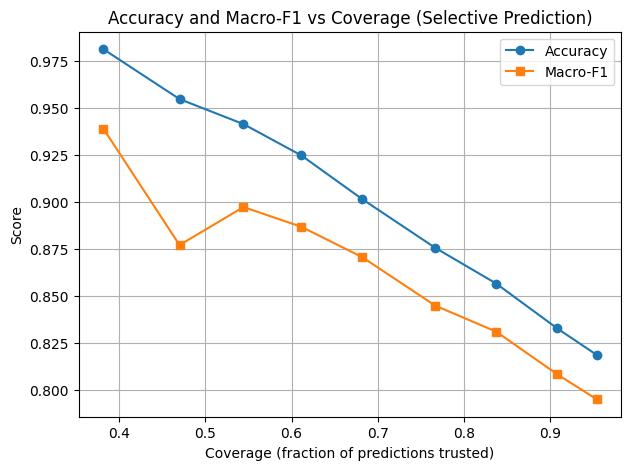

Threshold | Coverage | Accuracy | Macro-F1
0.50      | 0.95     | 0.819   | 0.795
0.55      | 0.91     | 0.833   | 0.808
0.60      | 0.84     | 0.857   | 0.831
0.65      | 0.77     | 0.876   | 0.845
0.70      | 0.68     | 0.902   | 0.871
0.75      | 0.61     | 0.925   | 0.887
0.80      | 0.54     | 0.942   | 0.897
0.85      | 0.47     | 0.955   | 0.877
0.90      | 0.38     | 0.981   | 0.939


In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

thresholds = np.linspace(0.5, 0.9, 9)  # thresholds: 0.50 ... 0.90
coverage = []
trusted_accuracy = []
trusted_f1 = []

y_pred = P.argmax(axis=1)
confidence = P.max(axis=1)

for t in thresholds:
    mask = confidence >= t
    if mask.sum() > 0:
        acc = (y_test_idx[mask] == y_pred[mask]).mean()
        f1 = f1_score(y_test_idx[mask], y_pred[mask], average="macro")
        coverage.append(mask.mean())  # fraction trusted
        trusted_accuracy.append(acc)
        trusted_f1.append(f1)
    else:
        coverage.append(0)
        trusted_accuracy.append(0)
        trusted_f1.append(0)

# --- Plot both Accuracy and Macro-F1 vs Coverage ---
plt.figure(figsize=(7,5))
plt.plot(coverage, trusted_accuracy, marker='o', label="Accuracy")
plt.plot(coverage, trusted_f1, marker='s', label="Macro-F1")
plt.xlabel("Coverage (fraction of predictions trusted)")
plt.ylabel("Score")
plt.title("Accuracy and Macro-F1 vs Coverage (Selective Prediction)")
plt.legend()
plt.grid(True)
plt.show()

# --- Print table ---
print("Threshold | Coverage | Accuracy | Macro-F1")
for t,c,a,f in zip(thresholds, coverage, trusted_accuracy, trusted_f1):
    print(f"{t:.2f}      | {c:.2f}     | {a:.3f}   | {f:.3f}")


#Misclassification Check

In [41]:
import pandas as pd

# Assuming 'misclassified_mask' and 'y_test_idx' are available from previous steps
# If not, you would need to recreate them:
y_true = y_test_idx # True labels (0-indexed)
y_pred_ens = P.argmax(axis=1) # Ensemble predictions (0-indexed)
misclassified_mask = (y_pred_ens != y_true)

# Select the correctly classified samples using the inverse of the misclassified_mask
correctly_classified_mask = ~misclassified_mask
correctly_classified_samples = X_test_tree[correctly_classified_mask].copy()

# Add the true and predicted labels to the correctly classified samples DataFrame
correctly_classified_samples['True_Label'] = y_true[correctly_classified_mask]
correctly_classified_samples['Predicted_Label'] = y_pred_ens[correctly_classified_mask]


# Assuming 'misclassified_samples' was created in a previous cell
# If not, you would need to recreate it:
misclassified_samples = X_test_tree[misclassified_mask].copy()
misclassified_samples['True_Label'] = y_true[misclassified_mask]
misclassified_samples['Predicted_Label'] = y_pred_ens[misclassified_mask]


print(f"Number of correctly classified samples: {len(correctly_classified_samples)}")
print(f"Number of misclassified samples: {len(misclassified_samples)}") # Assuming misclassified_samples is still in memory

# Display the first few correctly classified samples
print("\nFirst 5 correctly classified samples:")
display(correctly_classified_samples.head())

# Display the first few misclassified samples (assuming it's in memory)
print("\nFirst 5 misclassified samples:")
display(misclassified_samples.head())

Number of correctly classified samples: 224
Number of misclassified samples: 59

First 5 correctly classified samples:


,Sex,Age_at_onset,Clinical_onset_type,Spirometry,FVC,Ventilation,Tracheostomy,PEG,Therapy,Diagnostic_delay,...,PUMNS_Upper_Limb,PUMNS_Lower_Limb,PUMNS_Bulbar,CNS_Linear_Score,Disease_duration,Progression_rate,ALSFRS_R,ALSAQ_5,True_Label,Predicted_Label
741,0,65.0,3,1,1,0,0,0,0,8.0,...,8.0,6.0,1.0,7.0,14.0,1.571429,26.0,40.0,2,2
865,1,31.0,3,1,2,0,0,0,1,5.0,...,10.0,12.0,4.0,35.0,38.0,0.578947,26.0,85.0,2,2
339,0,51.0,3,1,1,0,0,0,1,8.0,...,5.0,6.0,0.0,7.0,29.0,0.482759,34.0,45.0,1,1
203,1,64.0,0,1,2,0,0,1,1,9.0,...,8.0,8.0,4.0,21.0,22.0,0.409091,39.0,50.0,0,0
816,0,73.0,0,1,1,0,0,0,3,47.0,...,8.0,10.0,4.0,13.0,65.0,0.184615,36.0,40.0,2,2



First 5 misclassified samples:


,Sex,Age_at_onset,Clinical_onset_type,Spirometry,FVC,Ventilation,Tracheostomy,PEG,Therapy,Diagnostic_delay,...,PUMNS_Upper_Limb,PUMNS_Lower_Limb,PUMNS_Bulbar,CNS_Linear_Score,Disease_duration,Progression_rate,ALSFRS_R,ALSAQ_5,True_Label,Predicted_Label
192,0,63.0,3,0,3,0,0,0,3,9.0,...,0.0,0.0,0.0,7.0,21.0,0.333333,41.0,25.0,0,1
783,0,59.0,3,1,3,0,0,0,3,85.0,...,6.0,6.0,2.0,7.0,94.0,0.085106,40.0,15.0,2,1
875,0,64.0,3,0,3,0,0,0,1,8.0,...,4.0,2.0,0.0,7.0,10.0,0.900000,39.0,40.0,2,1
845,1,71.0,0,0,2,0,0,0,1,3.0,...,0.0,0.0,1.0,28.0,6.0,5.166667,17.0,100.0,2,3
1362,1,72.0,3,0,2,0,0,0,0,9.0,...,11.0,13.0,3.0,7.0,12.0,3.166667,10.0,100.0,3,2


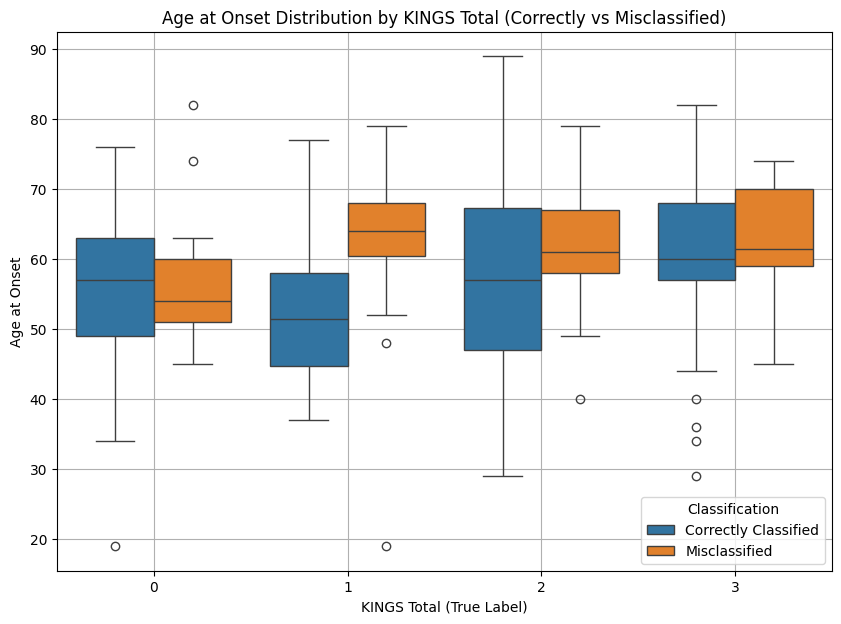

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'correctly_classified_samples' and 'misclassified_samples' DataFrames are available

# Combine the two dataframes for easier plotting
# Add a 'Classification' column to distinguish between correctly classified and misclassified samples
correctly_classified_samples['Classification'] = 'Correctly Classified'
misclassified_samples['Classification'] = 'Misclassified'

combined_df = pd.concat([correctly_classified_samples, misclassified_samples])

plt.figure(figsize=(10, 7))

# Plot boxplot of Age_at_onset vs True_Label, separated by Classification
sns.boxplot(data=combined_df, x='True_Label', y='Age_at_onset', hue='Classification')

plt.title('Age at Onset Distribution by KINGS Total (Correctly vs Misclassified)')
plt.xlabel('KINGS Total (True Label)')
plt.ylabel('Age at Onset')
plt.legend(title='Classification')
plt.grid(True)
plt.show()

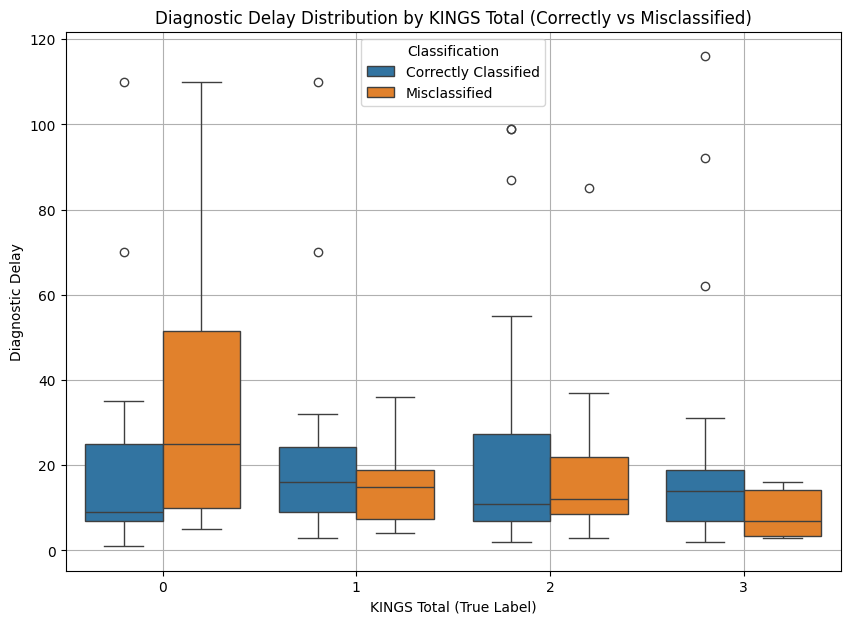

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'combined_df' DataFrame is available from the previous cell

plt.figure(figsize=(10, 7))

# Plot boxplot of Diagnostic_delay vs True_Label, separated by Classification
sns.boxplot(data=combined_df, x='True_Label', y='Diagnostic_delay', hue='Classification')

plt.title('Diagnostic Delay Distribution by KINGS Total (Correctly vs Misclassified)')
plt.xlabel('KINGS Total (True Label)')
plt.ylabel('Diagnostic Delay')
plt.legend(title='Classification')
plt.grid(True)
plt.show()

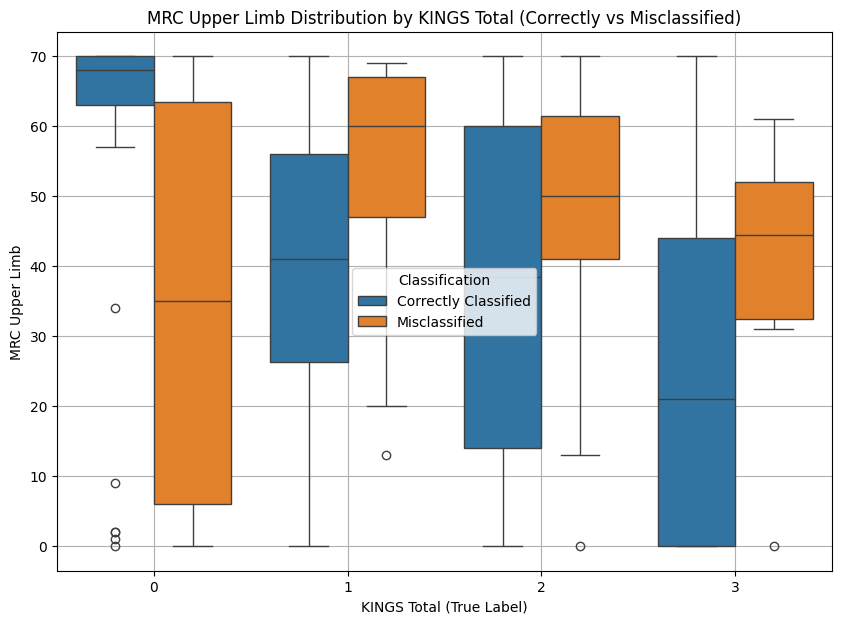

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'combined_df' DataFrame is available from previous cells

plt.figure(figsize=(10, 7))

# Plot boxplot of MRC_Upper_Limb vs True_Label, separated by Classification
sns.boxplot(data=combined_df, x='True_Label', y='MRC_Upper_Limb', hue='Classification')

plt.title('MRC Upper Limb Distribution by KINGS Total (Correctly vs Misclassified)')
plt.xlabel('KINGS Total (True Label)')
plt.ylabel('MRC Upper Limb')
plt.legend(title='Classification')
plt.grid(True)
plt.show()

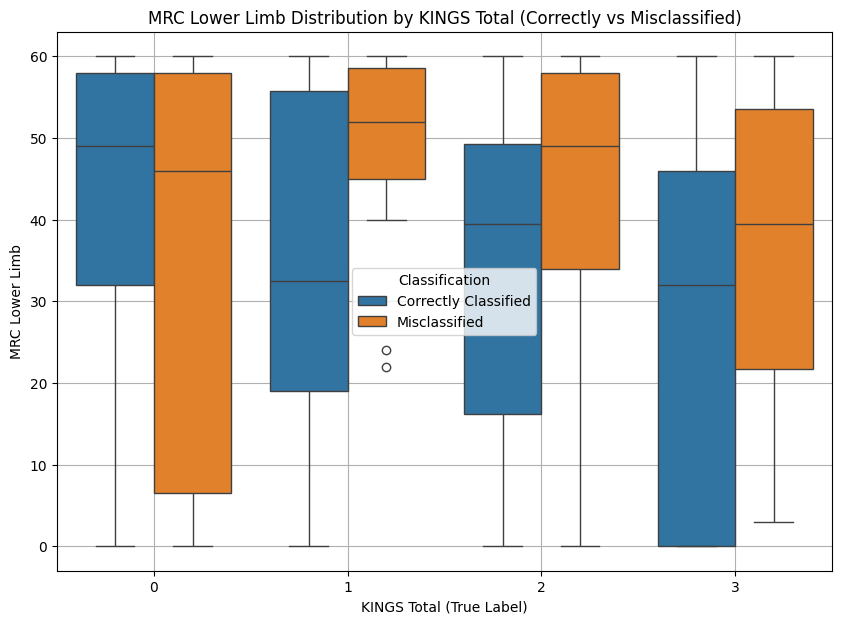

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'combined_df' DataFrame is available from previous cells

plt.figure(figsize=(10, 7))

# Plot boxplot of MRC_Lower_Limb vs True_Label, separated by Classification
sns.boxplot(data=combined_df, x='True_Label', y='MRC_Lower_Limb', hue='Classification')

plt.title('MRC Lower Limb Distribution by KINGS Total (Correctly vs Misclassified)')
plt.xlabel('KINGS Total (True Label)')
plt.ylabel('MRC Lower Limb')
plt.legend(title='Classification')
plt.grid(True)
plt.show()

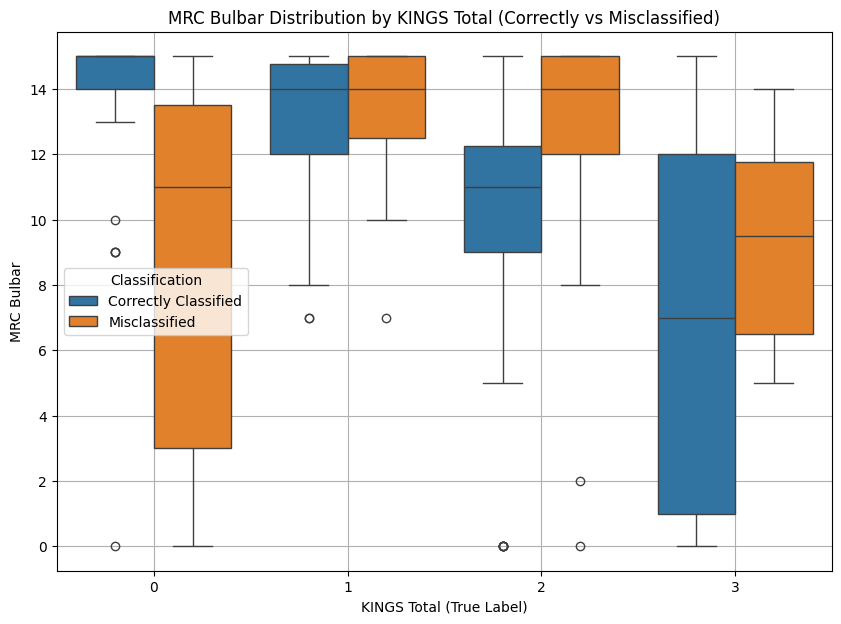

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'combined_df' DataFrame is available from previous cells

plt.figure(figsize=(10, 7))

# Plot boxplot of MRC_Bulbar vs True_Label, separated by Classification
sns.boxplot(data=combined_df, x='True_Label', y='MRC_Bulbar', hue='Classification')

plt.title('MRC Bulbar Distribution by KINGS Total (Correctly vs Misclassified)')
plt.xlabel('KINGS Total (True Label)')
plt.ylabel('MRC Bulbar')
plt.legend(title='Classification')
plt.grid(True)
plt.show()

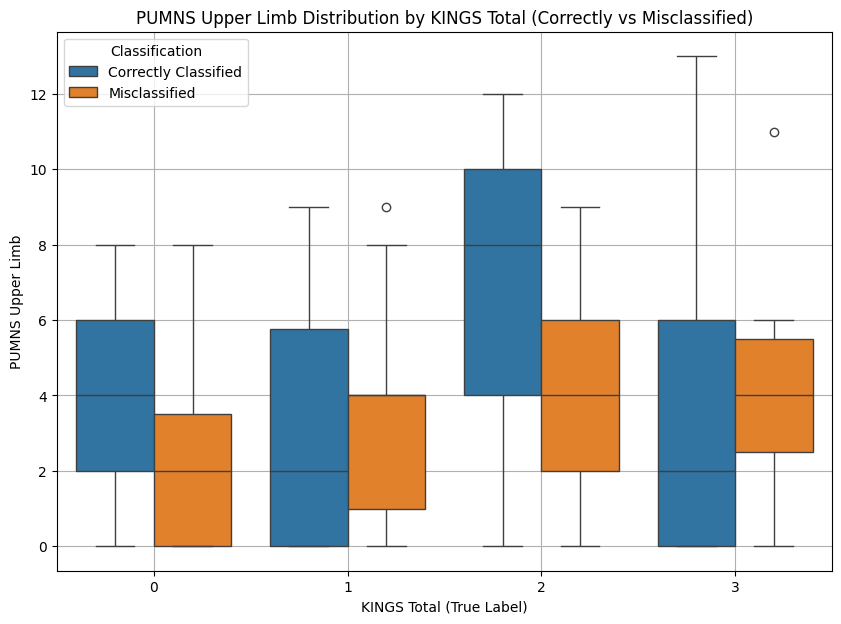

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'combined_df' DataFrame is available from previous cells

plt.figure(figsize=(10, 7))

# Plot boxplot of PUMNS_Upper_Limb vs True_Label, separated by Classification
sns.boxplot(data=combined_df, x='True_Label', y='PUMNS_Upper_Limb', hue='Classification')

plt.title('PUMNS Upper Limb Distribution by KINGS Total (Correctly vs Misclassified)')
plt.xlabel('KINGS Total (True Label)')
plt.ylabel('PUMNS Upper Limb')
plt.legend(title='Classification')
plt.grid(True)
plt.show()

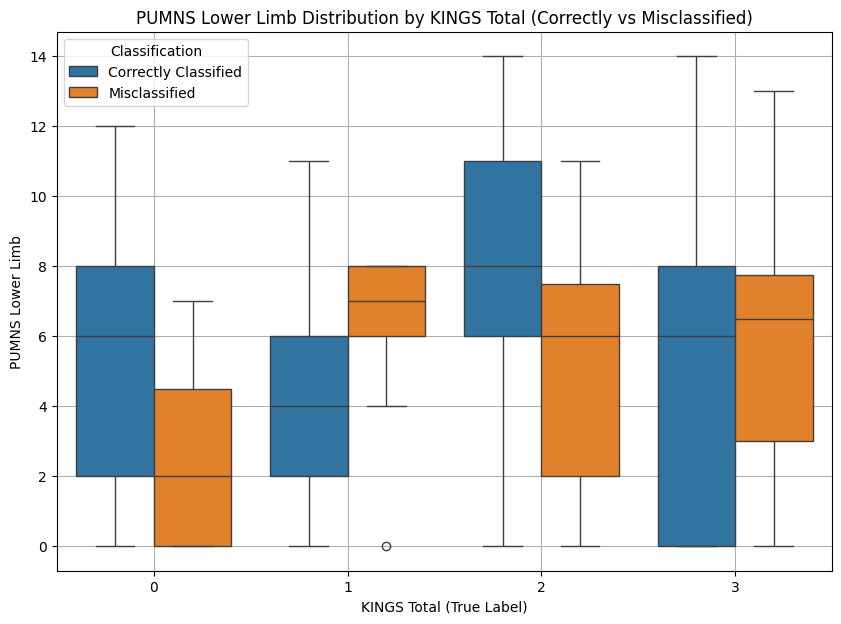

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'combined_df' DataFrame is available from previous cells

plt.figure(figsize=(10, 7))

# Plot boxplot of PUMNS_Lower_Limb vs True_Label, separated by Classification
sns.boxplot(data=combined_df, x='True_Label', y='PUMNS_Lower_Limb', hue='Classification')

plt.title('PUMNS Lower Limb Distribution by KINGS Total (Correctly vs Misclassified)')
plt.xlabel('KINGS Total (True Label)')
plt.ylabel('PUMNS Lower Limb')
plt.legend(title='Classification')
plt.grid(True)
plt.show()

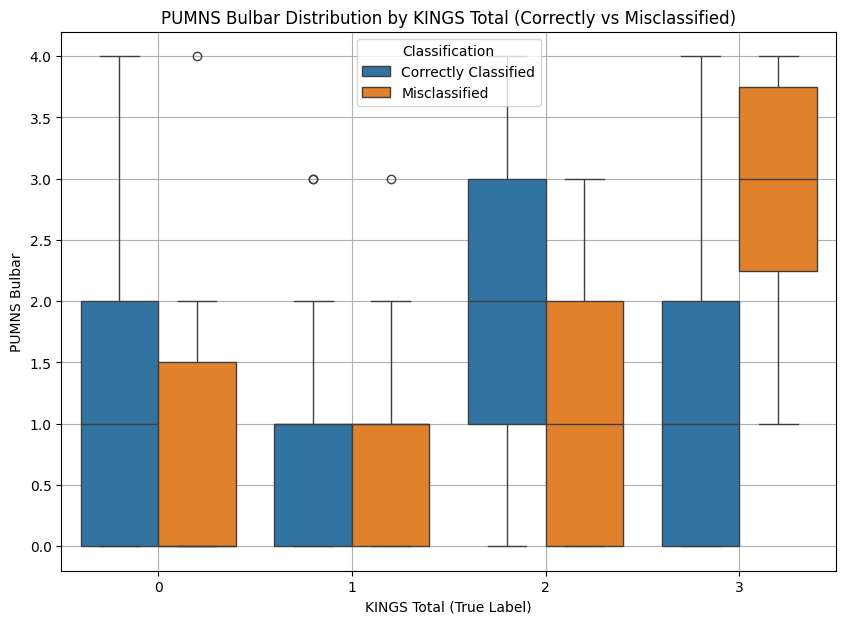

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'combined_df' DataFrame is available from previous cells

plt.figure(figsize=(10, 7))

# Plot boxplot of PUMNS_Bulbar vs True_Label, separated by Classification
sns.boxplot(data=combined_df, x='True_Label', y='PUMNS_Bulbar', hue='Classification')

plt.title('PUMNS Bulbar Distribution by KINGS Total (Correctly vs Misclassified)')
plt.xlabel('KINGS Total (True Label)')
plt.ylabel('PUMNS Bulbar')
plt.legend(title='Classification')
plt.grid(True)
plt.show()

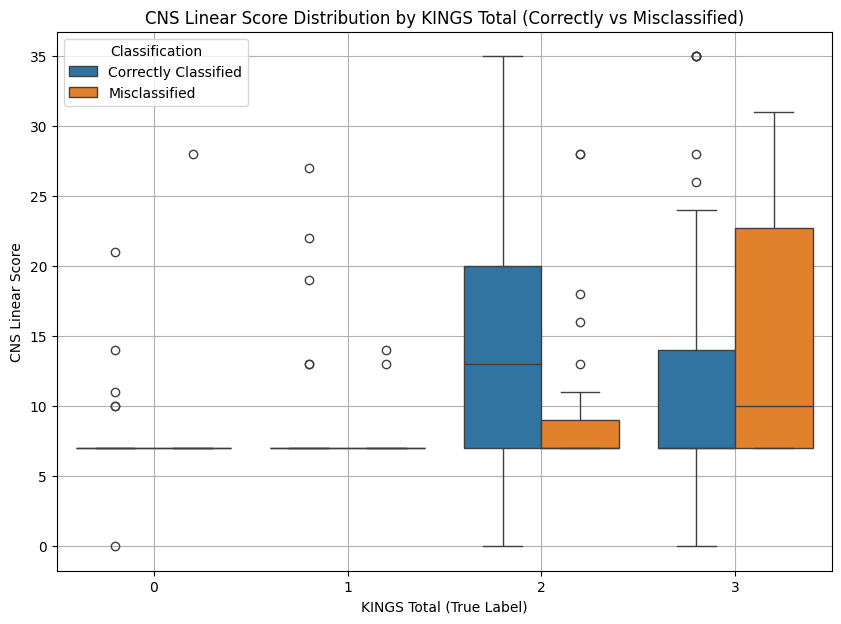

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'combined_df' DataFrame is available from previous cells

plt.figure(figsize=(10, 7))

# Plot boxplot of CNS_Linear_Score vs True_Label, separated by Classification
sns.boxplot(data=combined_df, x='True_Label', y='CNS_Linear_Score', hue='Classification')

plt.title('CNS Linear Score Distribution by KINGS Total (Correctly vs Misclassified)')
plt.xlabel('KINGS Total (True Label)')
plt.ylabel('CNS Linear Score')
plt.legend(title='Classification')
plt.grid(True)
plt.show()

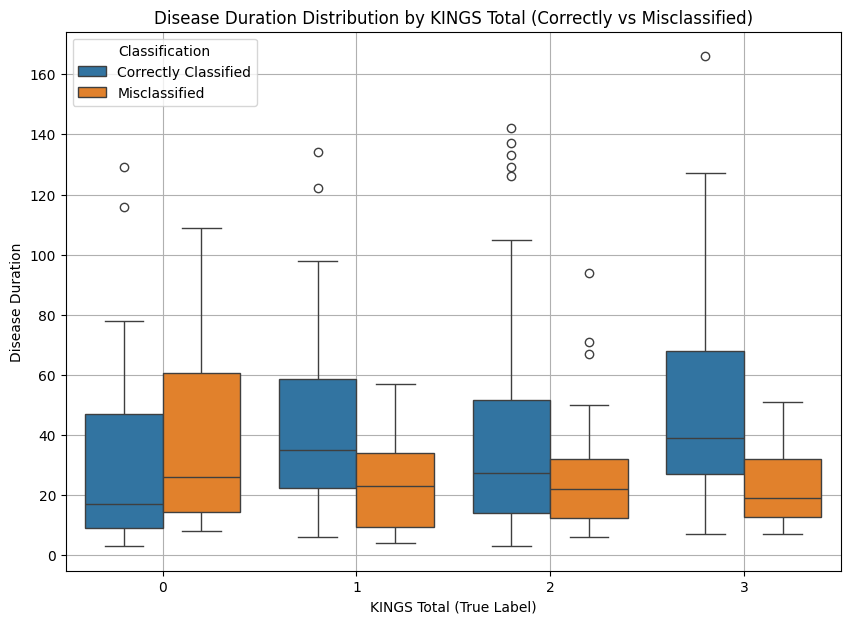

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'combined_df' DataFrame is available from previous cells

plt.figure(figsize=(10, 7))

# Plot boxplot of Disease_duration vs True_Label, separated by Classification
sns.boxplot(data=combined_df, x='True_Label', y='Disease_duration', hue='Classification')

plt.title('Disease Duration Distribution by KINGS Total (Correctly vs Misclassified)')
plt.xlabel('KINGS Total (True Label)')
plt.ylabel('Disease Duration')
plt.legend(title='Classification')
plt.grid(True)
plt.show()

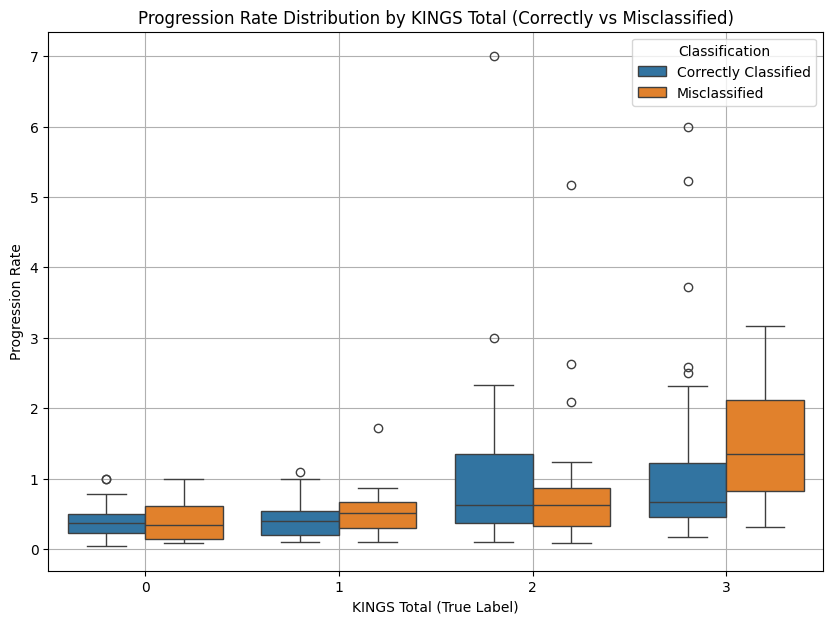

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'combined_df' DataFrame is available from previous cells

plt.figure(figsize=(10, 7))

# Plot boxplot of Progression_rate vs True_Label, separated by Classification
sns.boxplot(data=combined_df, x='True_Label', y='Progression_rate', hue='Classification')

plt.title('Progression Rate Distribution by KINGS Total (Correctly vs Misclassified)')
plt.xlabel('KINGS Total (True Label)')
plt.ylabel('Progression Rate')
plt.legend(title='Classification')
plt.grid(True)
plt.show()

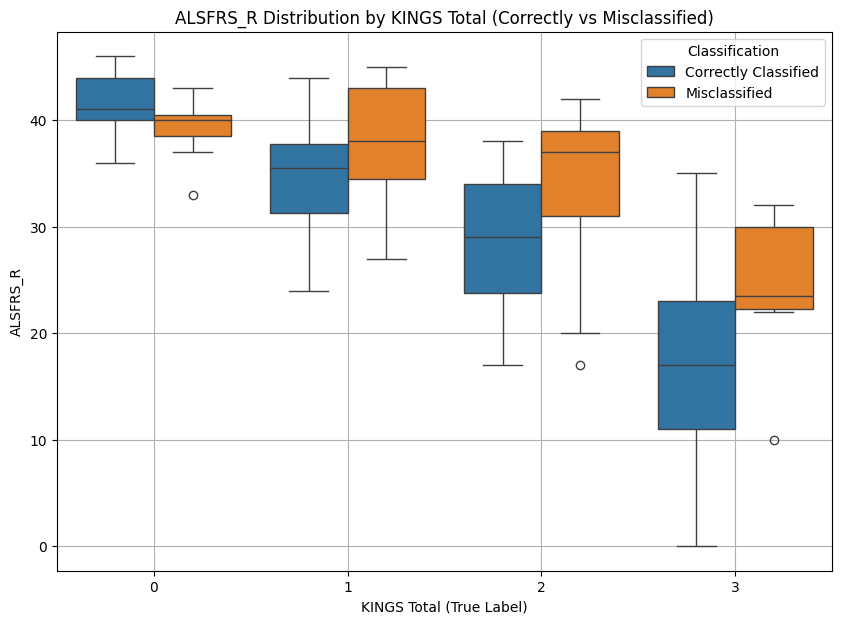

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'combined_df' DataFrame is available from previous cells

plt.figure(figsize=(10, 7))

# Plot boxplot of ALSFRS_R vs True_Label, separated by Classification
sns.boxplot(data=combined_df, x='True_Label', y='ALSFRS_R', hue='Classification')

plt.title('ALSFRS_R Distribution by KINGS Total (Correctly vs Misclassified)')
plt.xlabel('KINGS Total (True Label)')
plt.ylabel('ALSFRS_R')
plt.legend(title='Classification')
plt.grid(True)
plt.show()

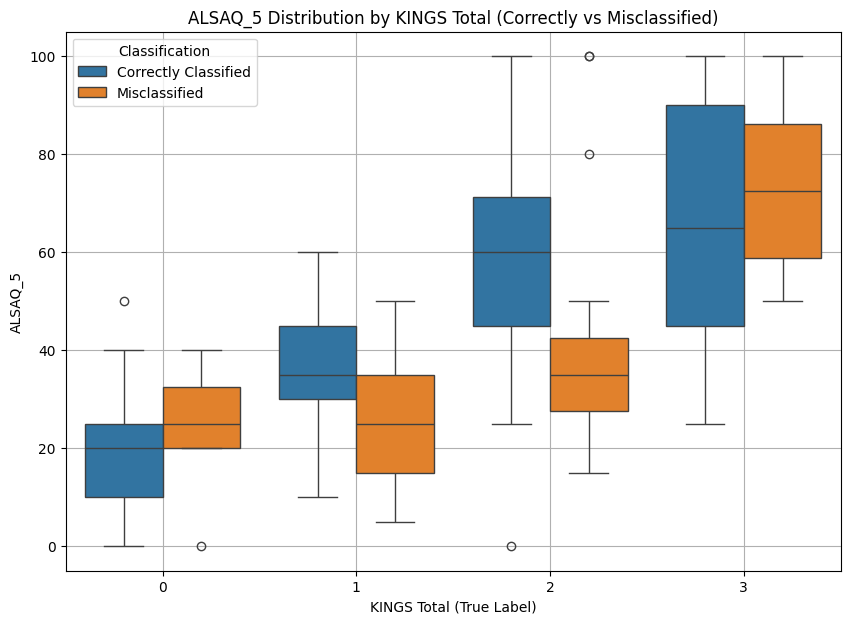

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'combined_df' DataFrame is available from previous cells

plt.figure(figsize=(10, 7))

# Plot boxplot of ALSAQ_5 vs True_Label, separated by Classification
sns.boxplot(data=combined_df, x='True_Label', y='ALSAQ_5', hue='Classification')

plt.title('ALSAQ_5 Distribution by KINGS Total (Correctly vs Misclassified)')
plt.xlabel('KINGS Total (True Label)')
plt.ylabel('ALSAQ_5')
plt.legend(title='Classification')
plt.grid(True)
plt.show()

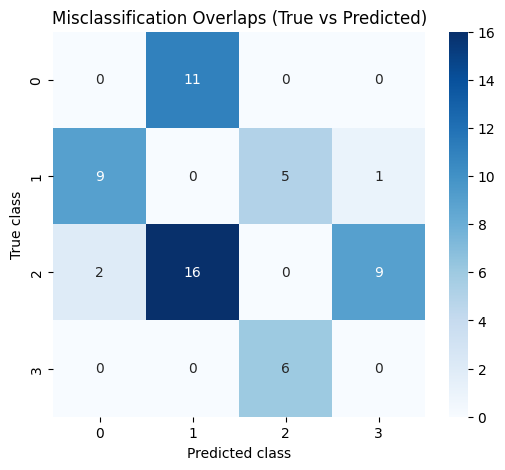

pred  0   1  2  3
true             
0     0  11  0  0
1     9   0  5  1
2     2  16  0  9
3     0   0  6  0


In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Suppose you already have a DataFrame of errors:
# df_errors with columns: ["true", "pred"]

# Build co-occurrence table (true vs predicted)
overlap = pd.crosstab(df_errors["true"], df_errors["pred"])

# Plot heatmap
plt.figure(figsize=(6,5))
sns.heatmap(overlap, annot=True, fmt="d", cmap="Blues")
plt.title("Misclassification Overlaps (True vs Predicted)")
plt.xlabel("Predicted class")
plt.ylabel("True class")
plt.show()

print(overlap)


In [48]:
X_train_linear_scaled.columns

Index(['Age_at_onset', 'Diagnostic_delay', 'MRC_Upper_Limb', 'MRC_Lower_Limb',
       'MRC_Bulbar', 'PUMNS_Upper_Limb', 'PUMNS_Lower_Limb', 'PUMNS_Bulbar',
       'CNS_Linear_Score', 'Disease_duration', 'Progression_rate', 'ALSFRS_R',
       'ALSAQ_5', 'Clinical_onset_type_bulbare',
       'Clinical_onset_type_multiplo', 'Clinical_onset_type_respiratorio',
       'Clinical_onset_type_spinale', 'FVC', 'PEG', 'Sex', 'Spirometry',
       'Therapy_Edaravone', 'Therapy_Riluzolo', 'Therapy_Riluzolo e Edaravone',
       'Therapy_nessuna terapia', 'Tracheostomy', 'Ventilation'],
      dtype='object')